# The seaborn.objects interface

In [2]:
import seaborn as sns
sns.set_theme()

In [3]:
sns.__version__

'0.12.2'

seaborn.objects 네임스페이스는 seaborn 플롯을 만들기 위한 완전히 새로운 인터페이스로 버전 0.12에서 도입되었습니다.   
데이터 변환 및 플로팅을 위한 구성 가능한 클래스 모음으로 구성된 보다 일관되고 유연한 API를 제공합니다.   
기존 seaborn 기능과 달리 새로운 인터페이스는 처음부터 끝까지 플롯 상세내용 및 사용자지정을 matplotlib을 드롭다운하지 않고 지원하는 것을 목표로 합니다(필요한 경우 계속 가능함).   
   
> objects 인터페이스는 현재 실험적이며 불완전합니다. 활용하기에 충분히 안정적이지만 일부 다듬어지지 않거나 누락된 기능은 있습니다.

## Specifying a plot and mapping data

In [4]:
# objects interface 로드
# seaborn.objects 네임스페이스 : 모든 관련 클래스에 대한 액세스 제공
import seaborn.objects as so

In [5]:
# 사용 데이터 로드
penguins = sns.load_dataset("penguins")

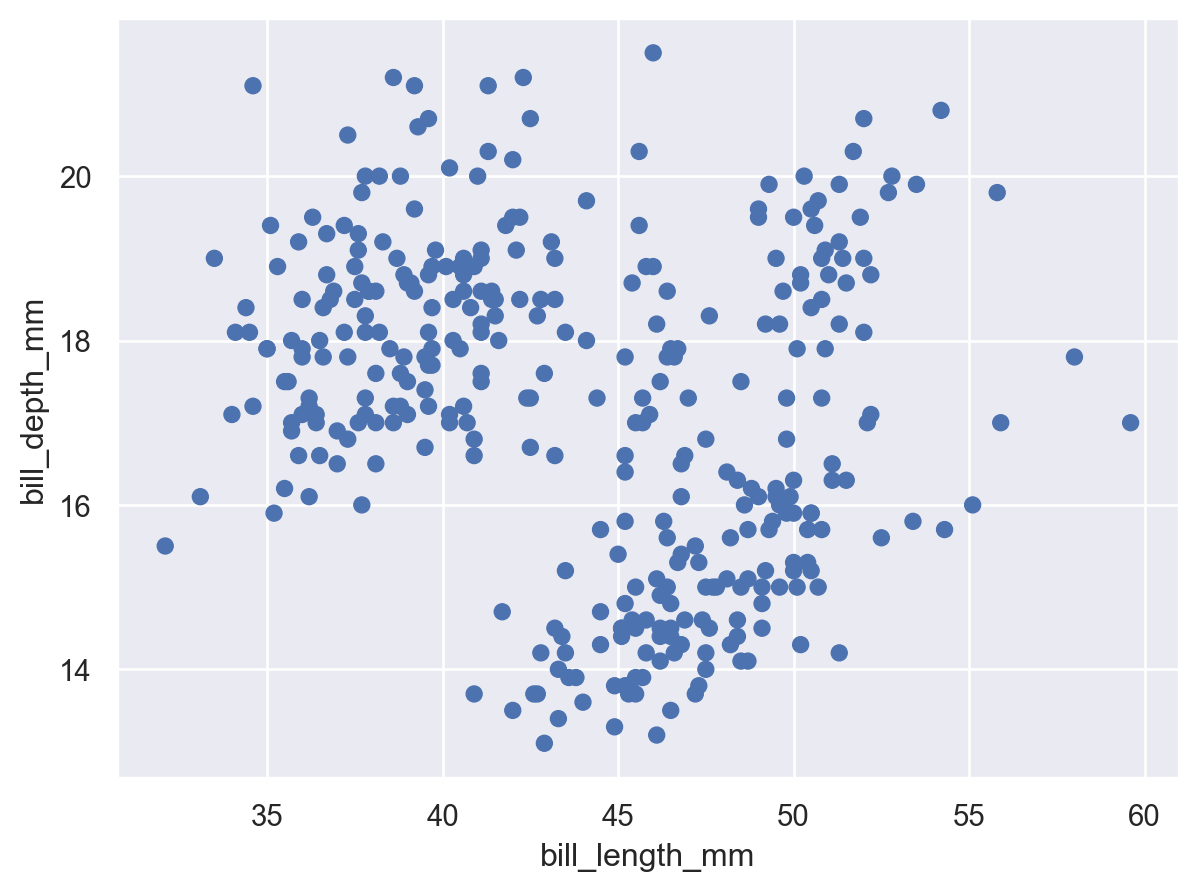

In [6]:
# Plot 객체 인스턴스화 > 해당 메서드를 호출하여 플롯 지정
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot())
)

산점도를 생성하는 이 코드는 꽤 친숙하게 보일 것입니다.   
seaborn.scatterplot()을 사용할 때와 마찬가지로 깔끔한 데이터 프레임(펭귄)을 전달하고 해당 열 중 두 개를 플롯의 x 와 y 에 할당했습니다.   
그러나 차트 유형으로 시작한 다음 일부 데이터 할당을 추가하는 대신 여기서는 데이터 할당으로 시작한 다음 그래픽 요소를 추가했습니다.   

### Setting properties
   
`Dot` 클래스는 데이터 값을 그래픽으로 나타내는 개체인 `Mark`의 예입니다. 각 마크에는 모양을 변경하기 위해 설정할 수 있는 여러 속성이 있습니다.

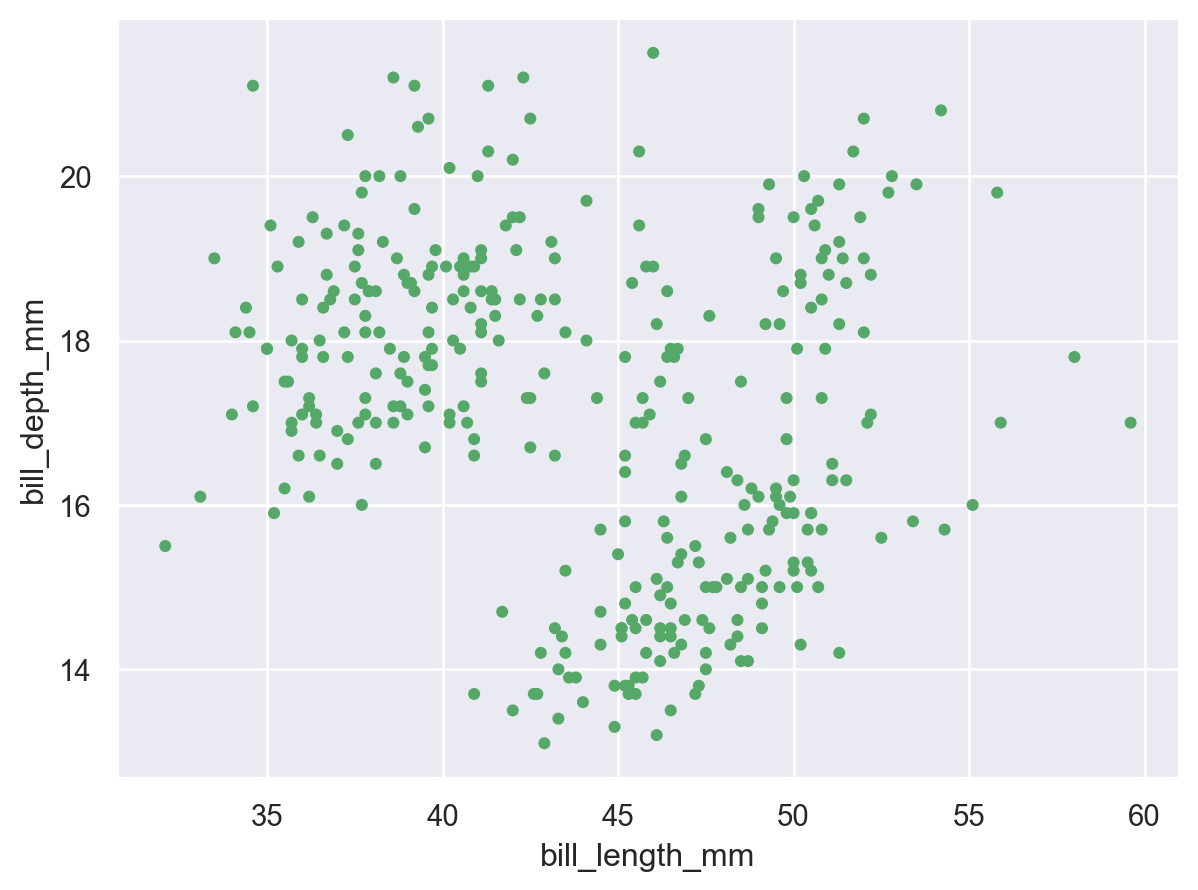

In [7]:
(
    so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
    .add(so.Dot(color="g", pointsize=4))
)

### Mapping properties
    
seaborn의 기능과 마찬가지로 데이터 값을 다양한 그래픽 속성에 매핑하는 것도 가능합니다.

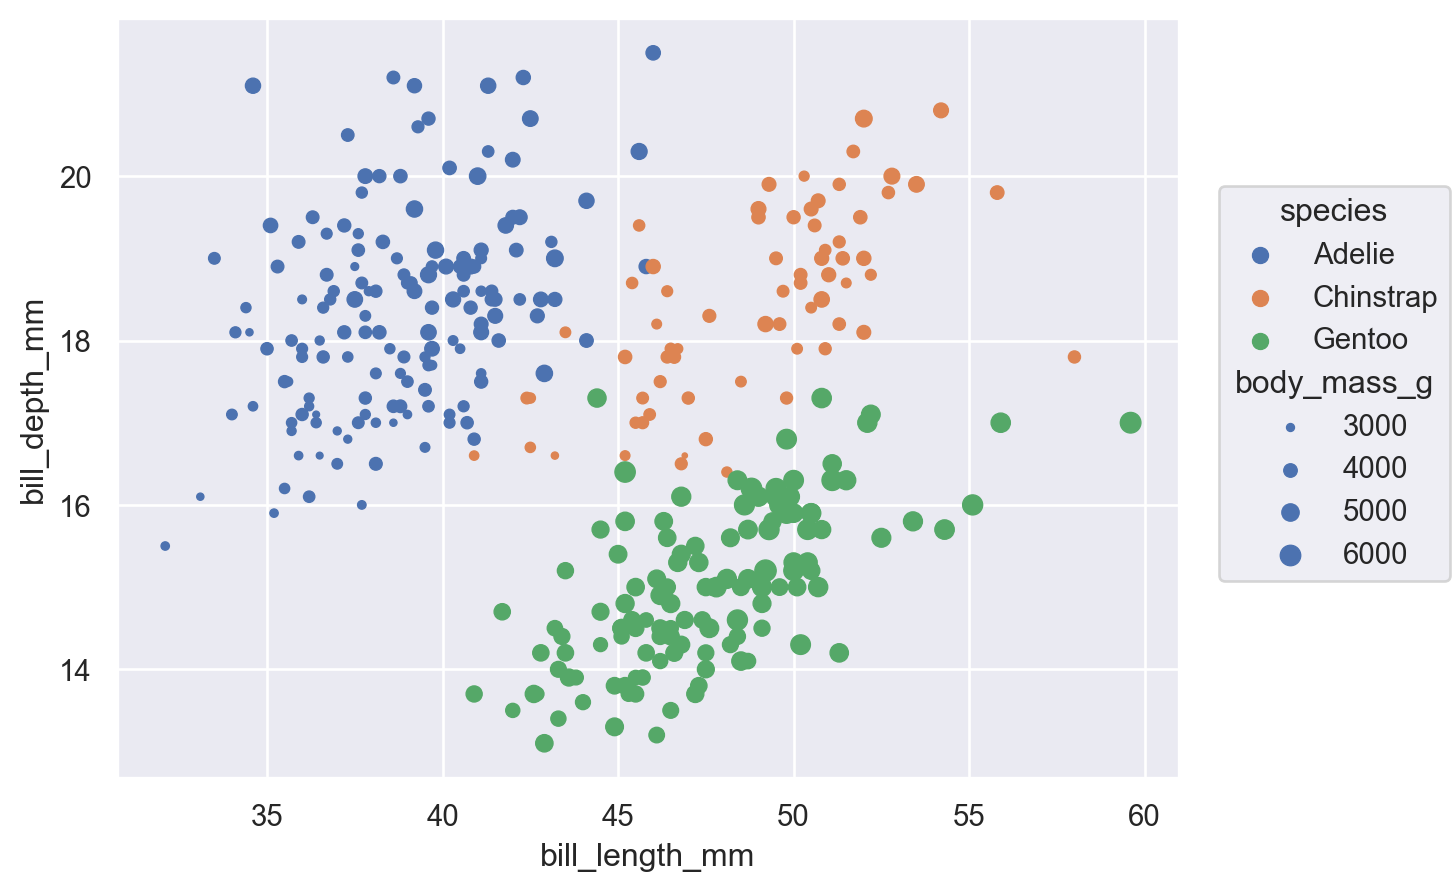

In [8]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        color="species", pointsize="body_mass_g",
    )
    .add(so.Dot())
)

이 기본 기능이 새롭지는 않지만 함수 API와의 중요한 차이점은 속성을 직접 설정하는 동일한 파라미터 이름을 사용하여 속성이 매핑된다는 것입니다(hue vs. color 등 대신). 중요한 것은 속성이 정의된 위치입니다. `Dot` 설정 초기에 **값**을 전달하면 직접 설정되지만 `Plot`을 설정할 때 **변수**를 할당하면 해당 데이터가 매핑됩니다.   
이러한 차이점 외에도 개체 인터페이스를 사용하면 훨씬 더 광범위한 마크 속성을 매핑할 수 있습니다.

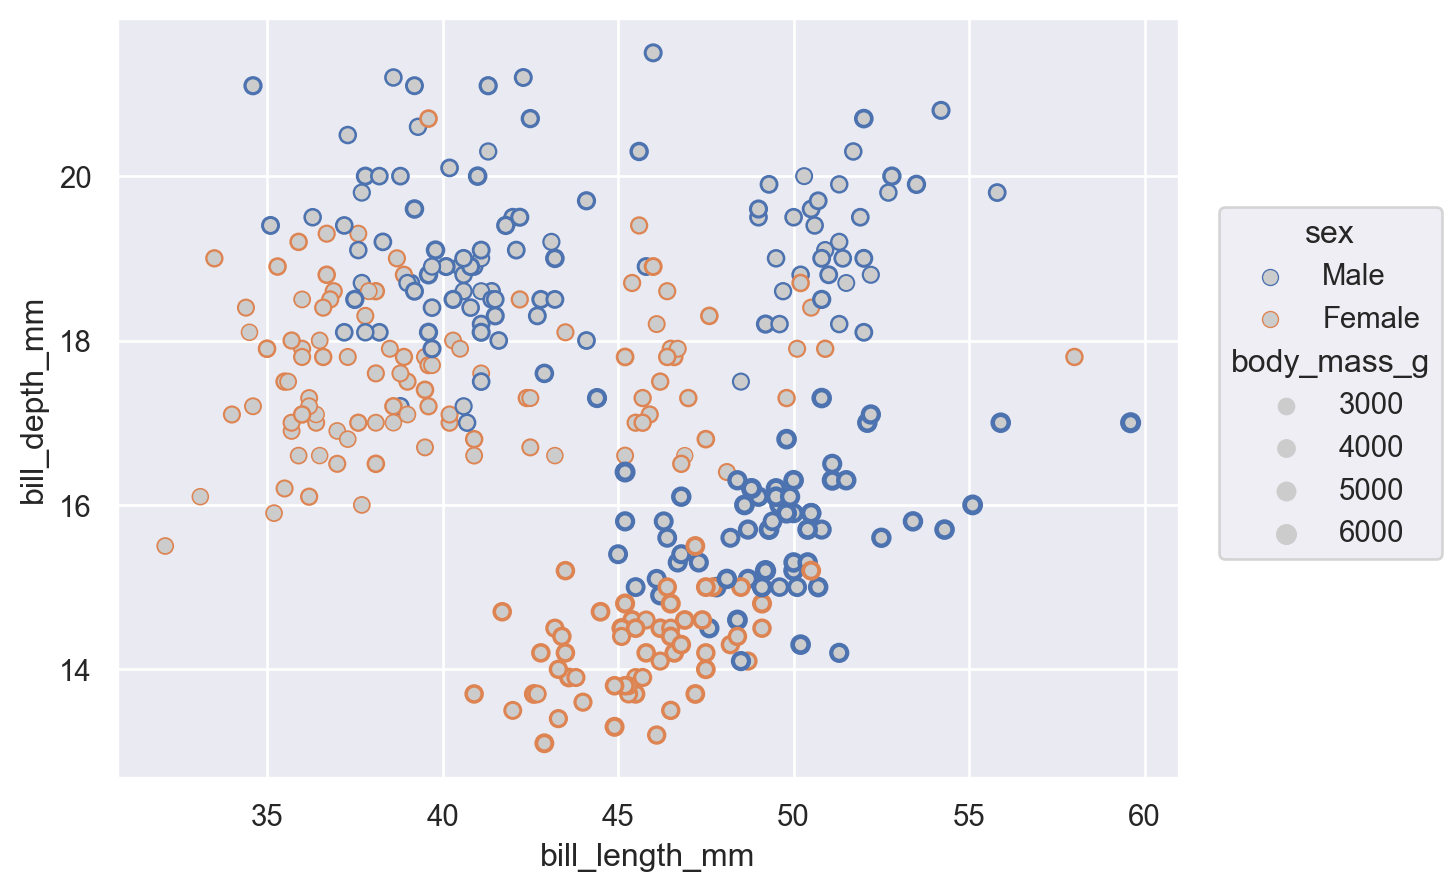

In [9]:
(
    so.Plot(
        penguins, x="bill_length_mm", y="bill_depth_mm",
        edgecolor="sex", edgewidth="body_mass_g",
    )
    .add(so.Dot(color=".8"))
)

### Defining groups

`Dot`은 각 데이터 포인트를 독립적으로 나타내므로 속성에 변수를 할당해도 각 점의 모양이 변경되는 효과만 있습니다.   
`Line`과 같이 관찰을 그룹화하거나 연결하는 마크의 경우 고유한 그래픽 요소의 수도 결정합니다.

In [10]:
healthexp = sns.load_dataset("healthexp")
healthexp.head()

Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9

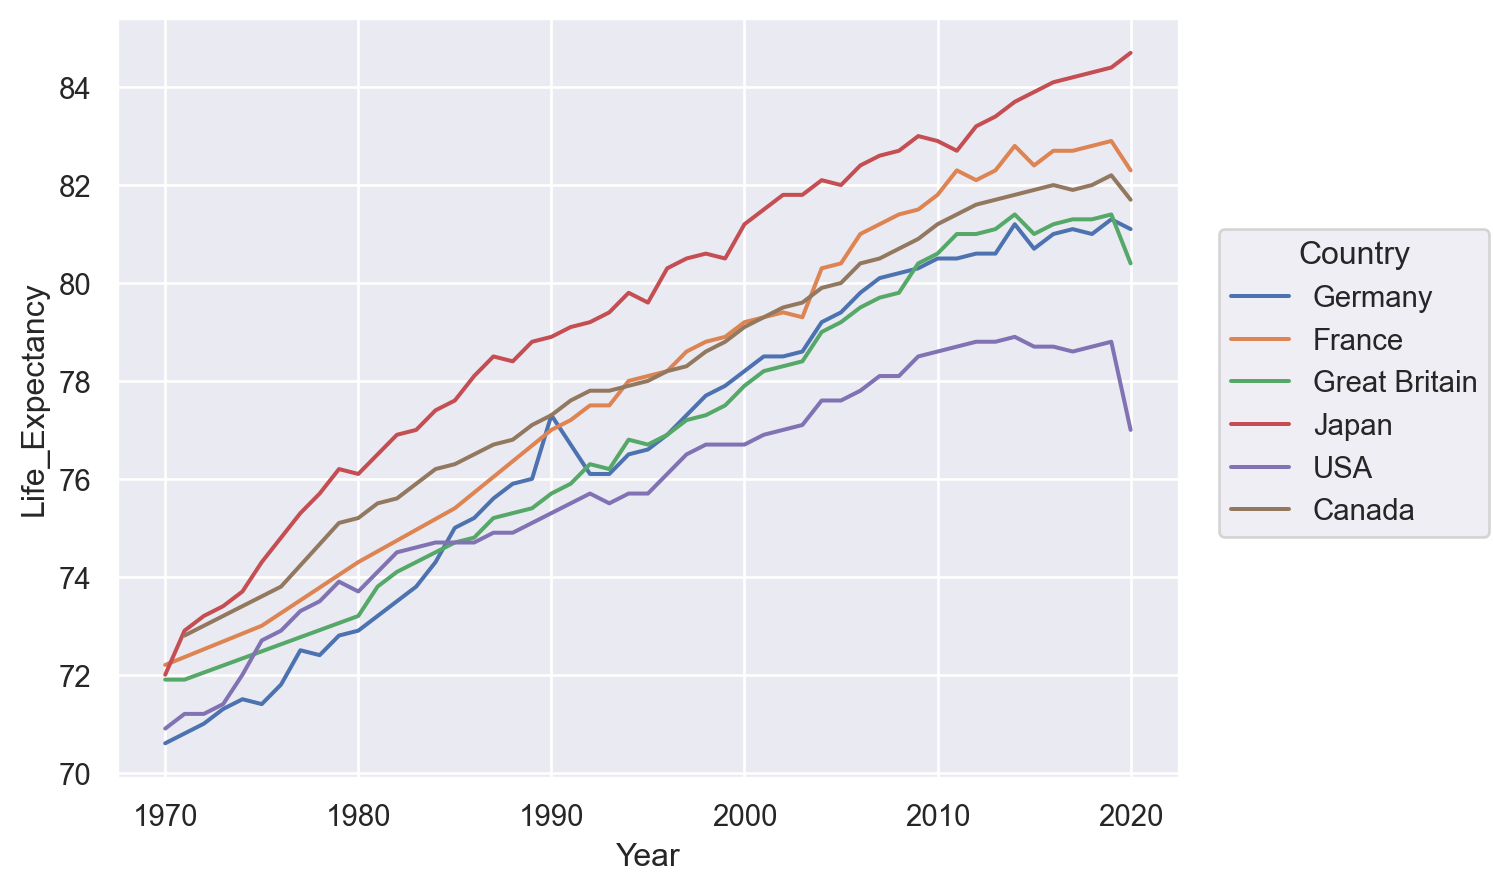

In [11]:
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", color="Country")
    .add(so.Line())
)

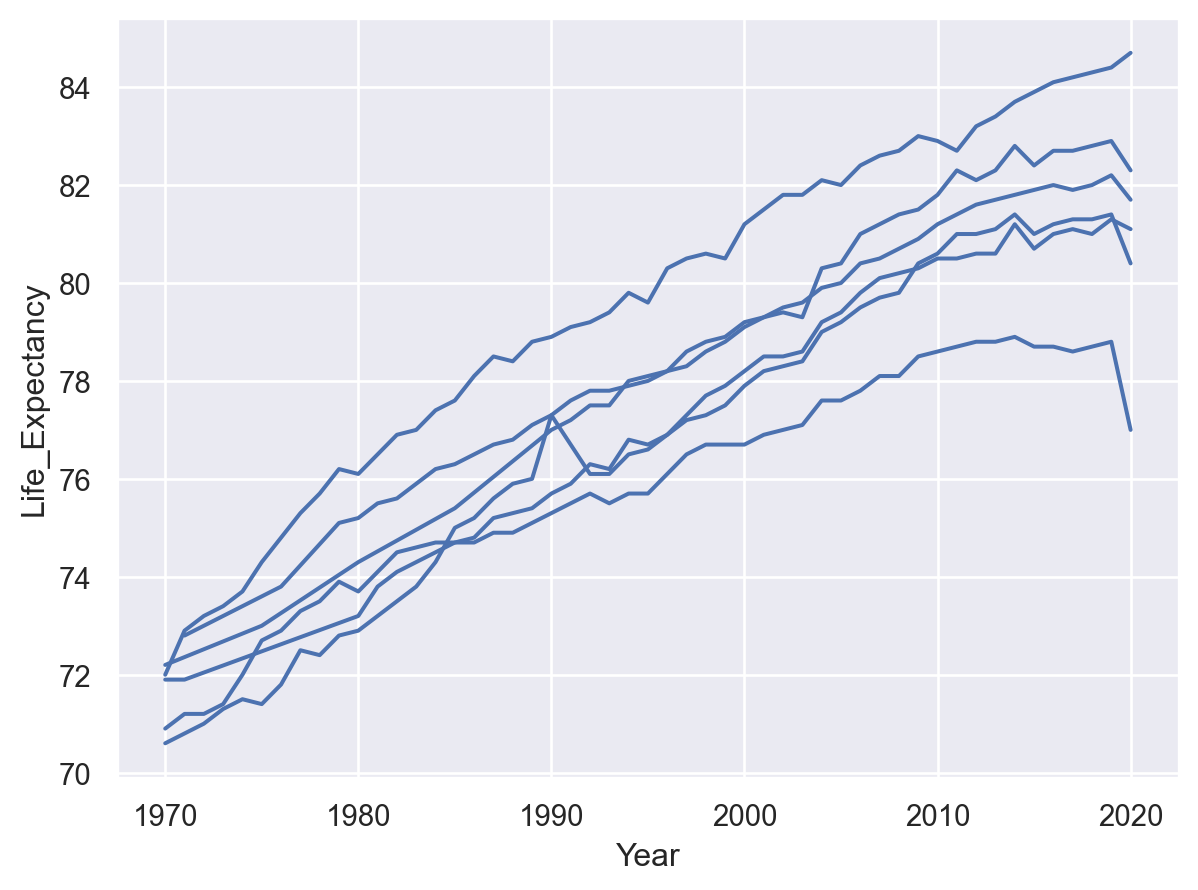

In [12]:
# group을 사용하여 시각적 속성을 변경하지 않고 그룹 정의
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy", group="Country")
    .add(so.Line())
)

## Transforming data before plotting
### Statistical transformation
    
많은 seaborn 함수와 마찬가지로 객체 인터페이스는 통계적 변환 지원  => `Agg`와 같은 `Stat` 개체에 의해 수행 

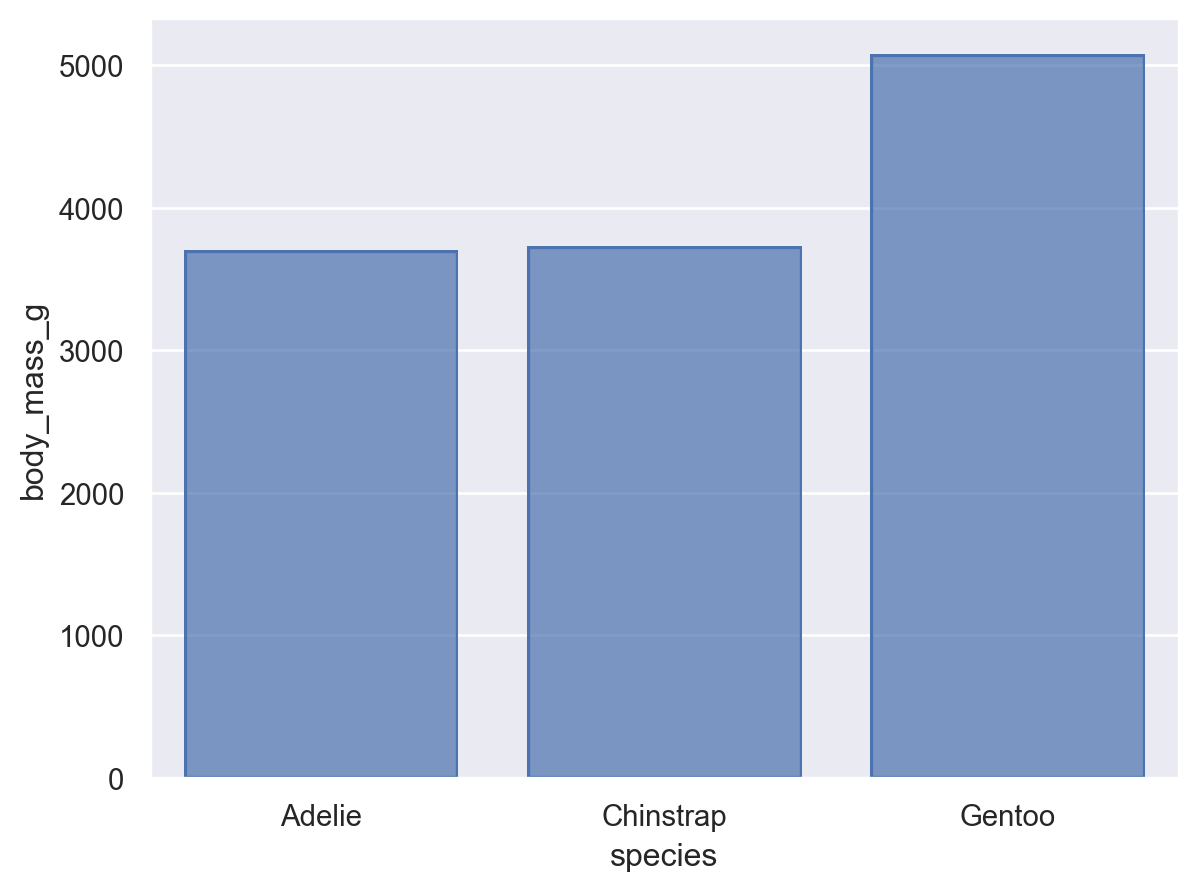

In [13]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Bar(), so.Agg())
)

함수 인터페이스에서 일부 시각적 표현(예: `seaborn.barplot()`)에서는 통계적 변환이 가능하지만 다른 것(예: `seaborn.scatterplot()`)에서는 불가능합니다.    
개체 인터페이스는 표시와 변환을 보다 명확하게 분리하여 `Mark` 및 `Stat` 개체를 구성할 수 있습니다.

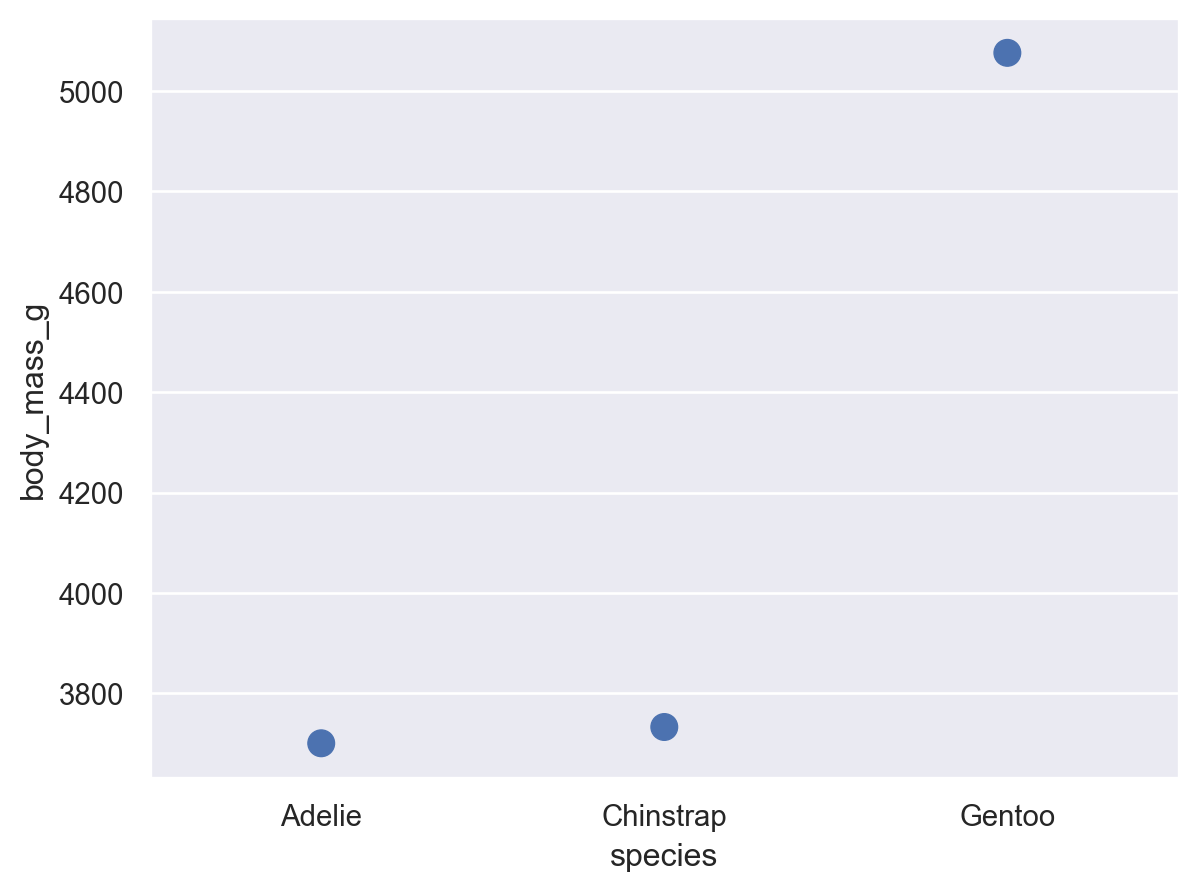

In [14]:
(
    so.Plot(penguins, x="species", y="body_mass_g")
    .add(so.Dot(pointsize=10), so.Agg())
)

속성을 매핑하여 그룹을 형성할 때 `stat` 변환은 각 그룹에 개별적으로 적용

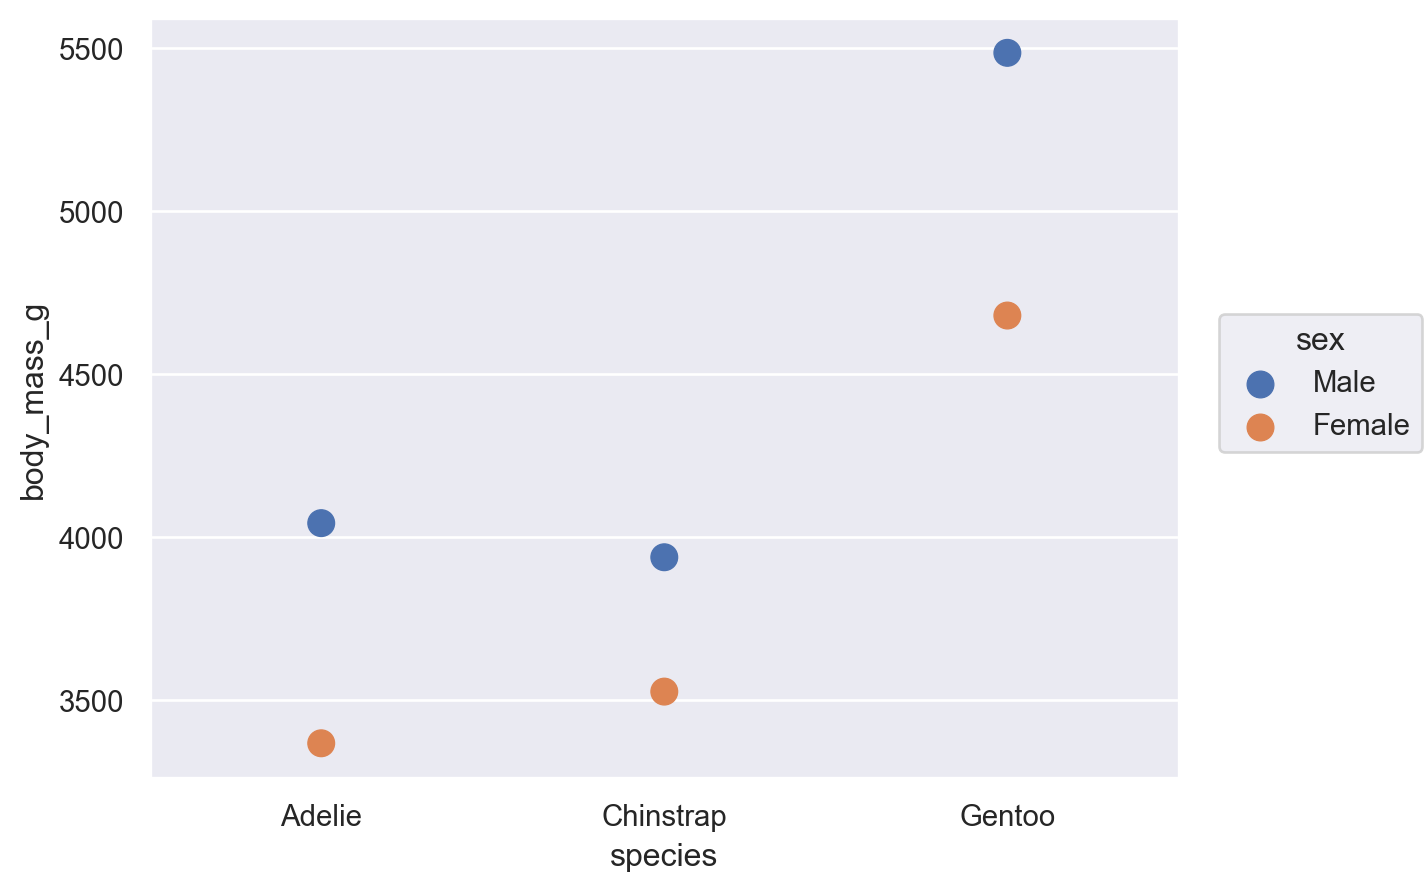

In [15]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(pointsize=10), so.Agg())
)

### Resolving overplotting

일부 seaborn 함수에는 `hue` 속성이 할당되면 `seaborn.barplot()`이 막대를 "dodges"할 때와 같이, 오버플로팅을 자동으로 해결하는 메커니즘이 있습니다.    
개체 인터페이스에는 덜 복잡한 기본 동작이 있습니다.    
여러 그룹을 나타내는 막대는 기본적으로 겹칩니다.

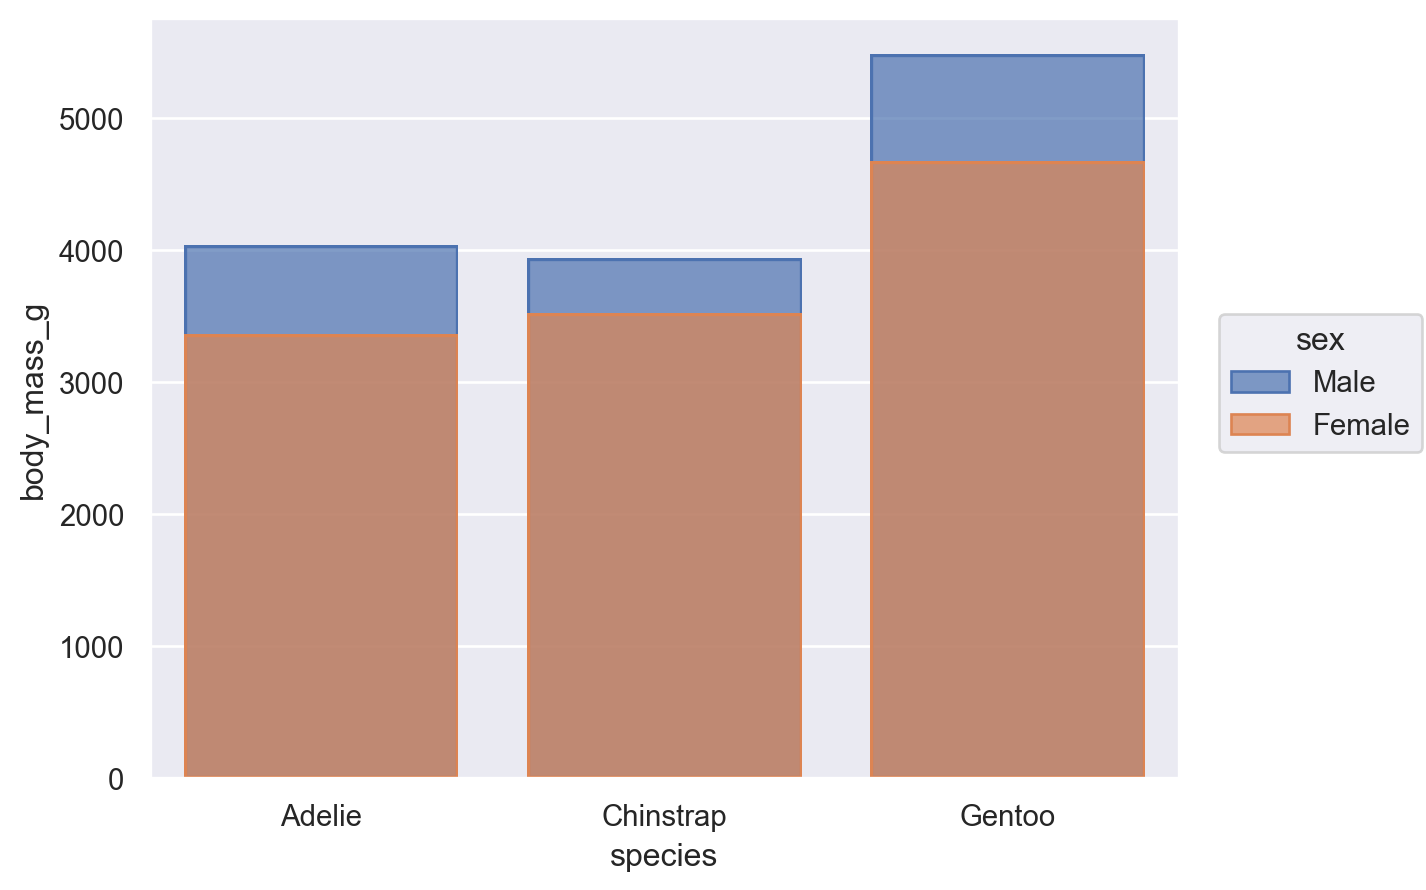

In [16]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg())
)

그럼에도 불구하고 `Dodge`에 의해 구현된 `Agg` 통계 및 두 번째 변환으로 `Bar` 마크를 구성할 수 있습니다.

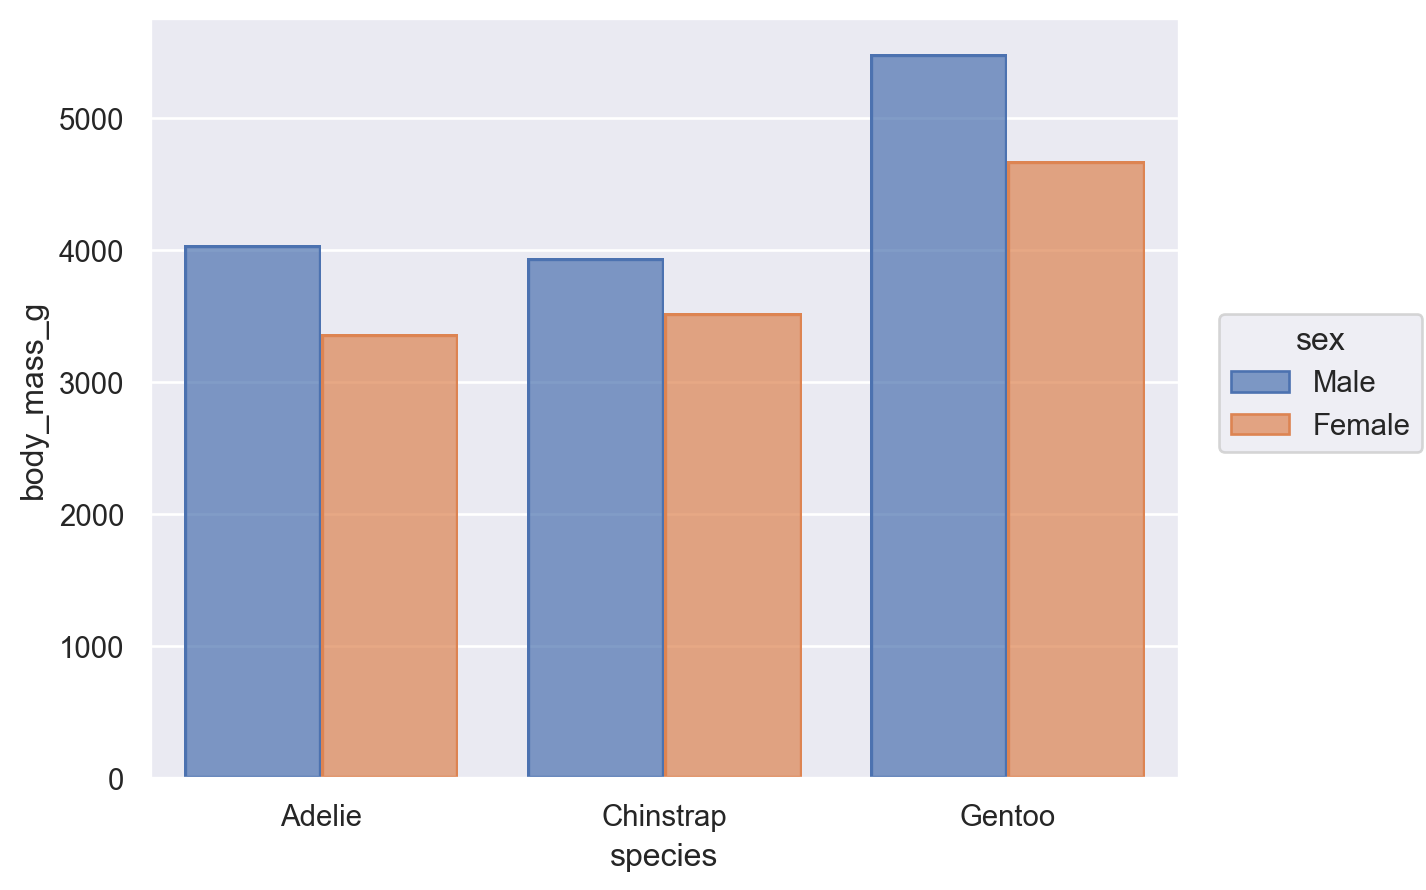

In [17]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

`Dodge` 클래스는 `Stat`과 유사하지만 x, y 좌표만 조정하는 `Move` 변환의 예입니다.     
`Move` 클래스는 모든 마크와 함께 적용할 수 있으며 먼저 `Stat`를 사용할 필요가 없습니다.

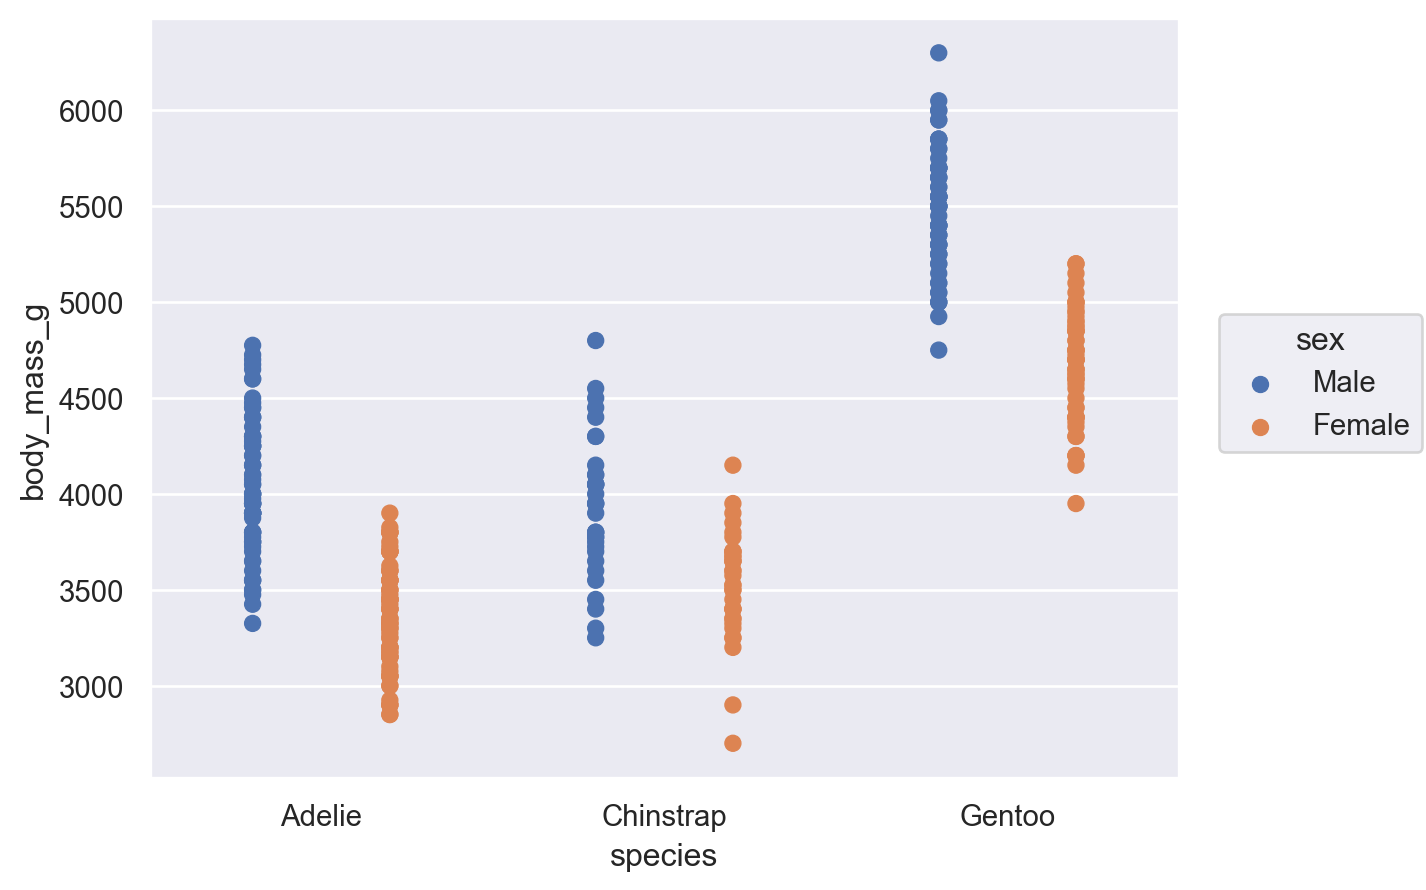

In [18]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge())
)

여러 `Move` 작업을 순서대로 적용할 수도 있습니다.

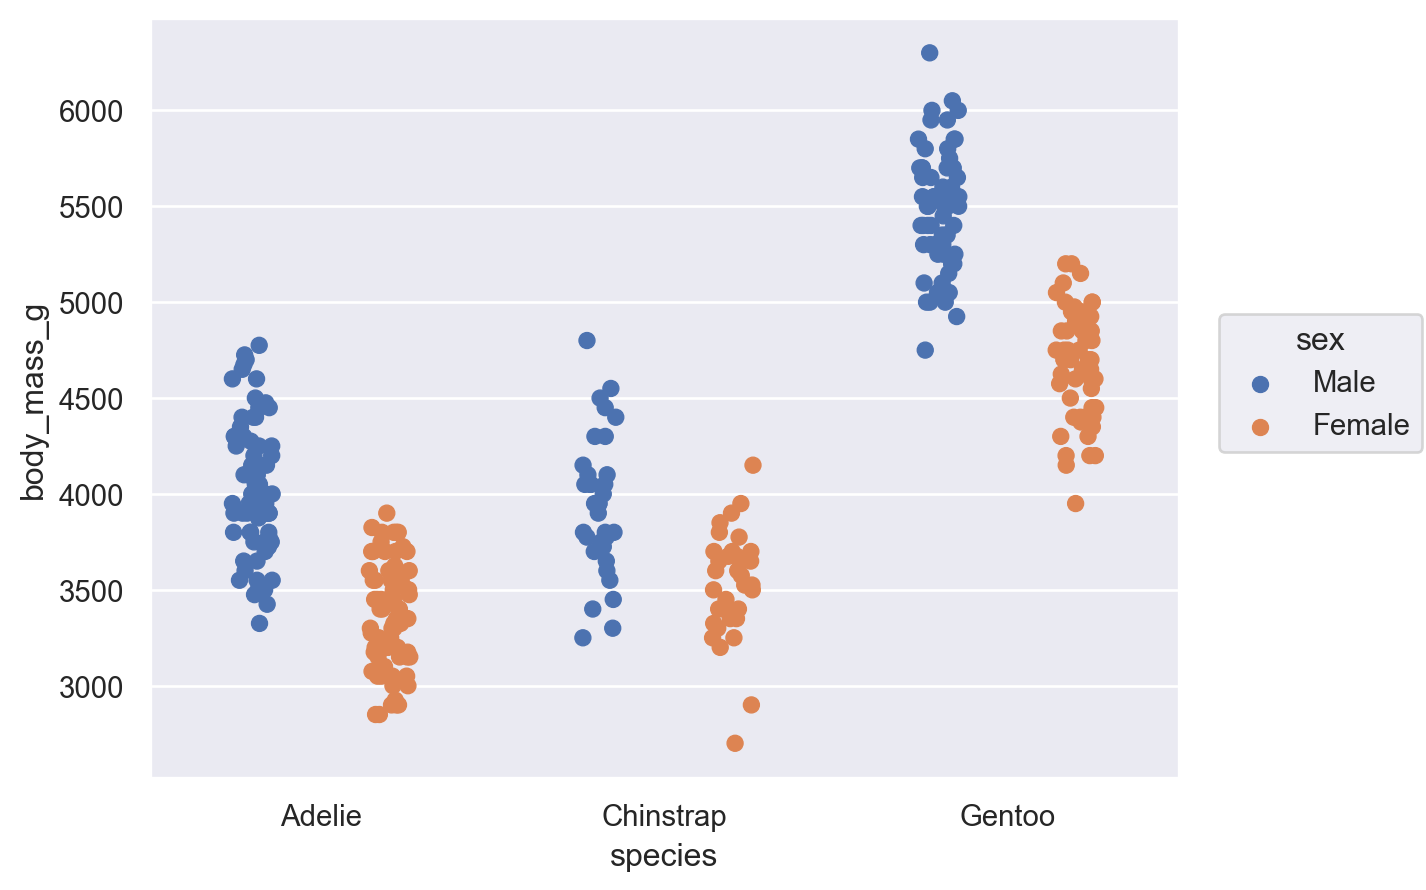

In [19]:
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Dot(), so.Dodge(), so.Jitter(.3))
)

### Creating variables through transformation

`Agg` 통계는 x, y가 모두 정의되어 있어야 하지만 통계 변환을 통해 변수를 만들 수도 있습니다.   
예를 들어, `Hist` 통계는 x, y 중 하나만 정의하면 관측치를 세어 다른 하나를 생성합니다.

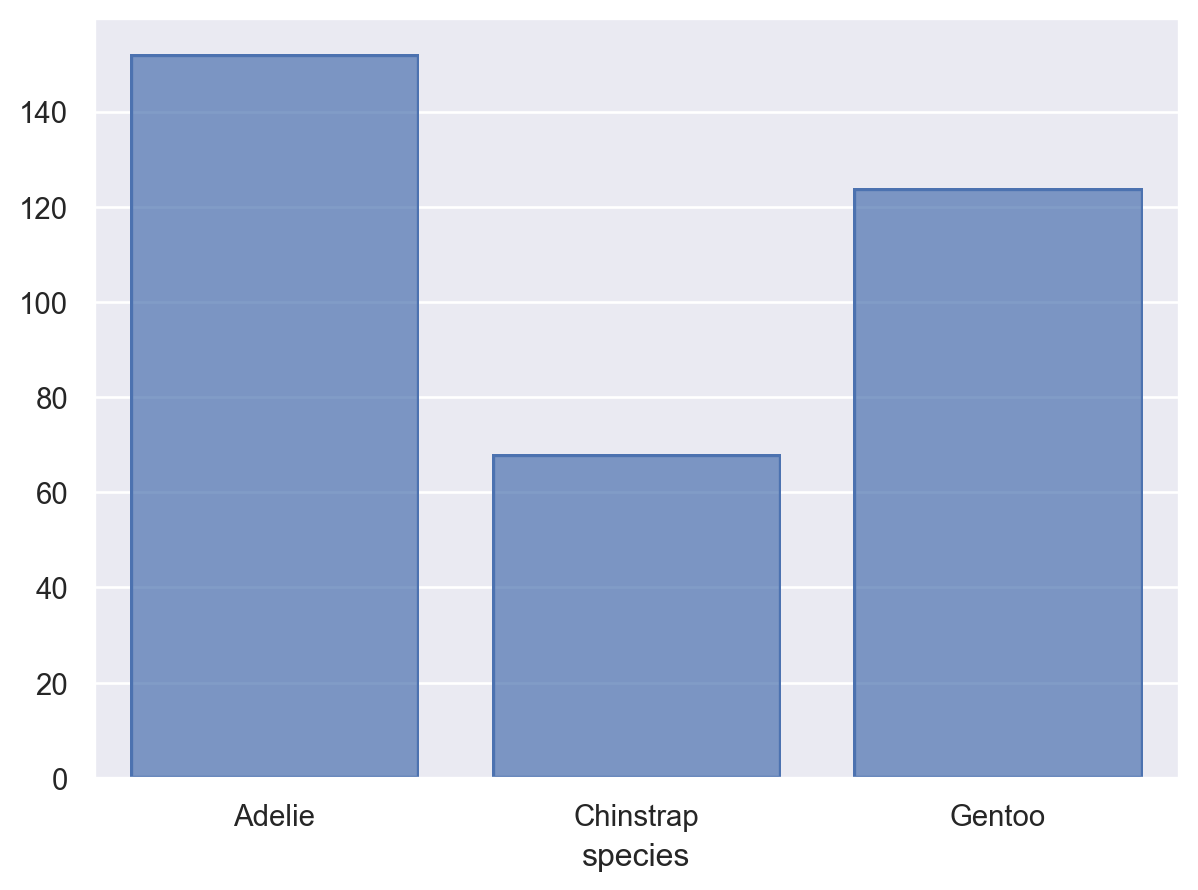

In [20]:
(
    so.Plot(penguins, x="species")
    .add(so.Bar(), so.Hist())
)

또, `Hist` 통계는 숫자 데이터가 주어질 때 새로운 x 값(bin으로)을 생성합니다:

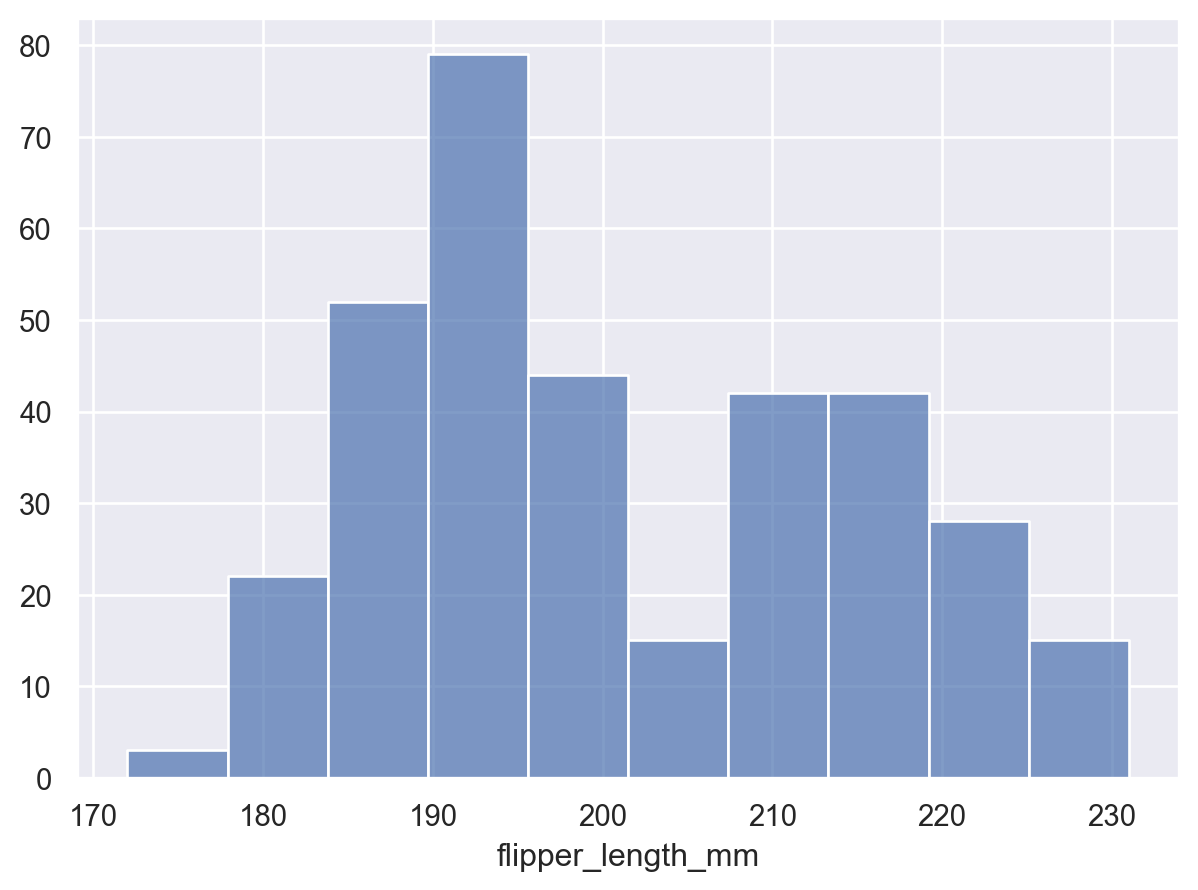

In [21]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .add(so.Bars(), so.Hist())
)

연속 x축이 있는 플롯에 개별 막대(`Bar`) 대신 막대들(`Bars`)을 사용한 방법에 주목하십시오. 이 두 마크는 관련이 있지만 막대들(`Bars`)은 기본값이 다르며 연속 히스토그램에 더 잘 작동합니다. 또한 보다 효율적인 다른 matplotlib 아티스트를 생성합니다. 다른 곳에서 단수/복수 마크 패턴을 찾을 수 있습니다. 복수 버전은 일반적으로 마크 수가 많은 경우에 최적화되어 있습니다.   
   
   일부 변환은 x와 y를 모두 허용하지만 각 좌표에 대한 간격 데이터를 추가합니다. 이는 집계 후 오류 막대를 플로팅하는 데 특히 적합합니다.

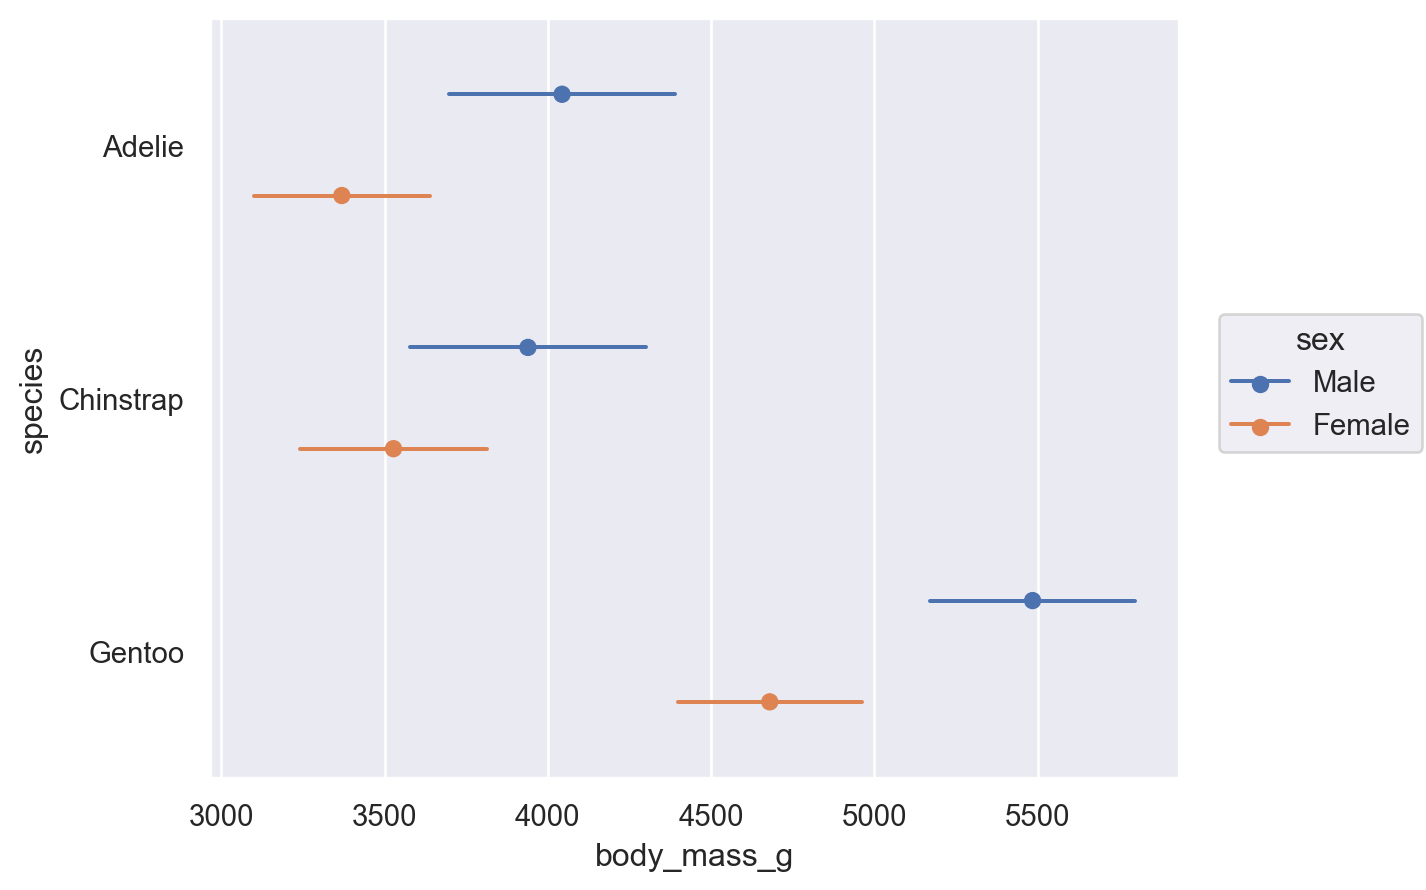

In [22]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Range(), so.Est(errorbar="sd"), so.Dodge())
    .add(so.Dot(), so.Agg(), so.Dodge())
)

### Orienting marks and transforms

막대를 aggregating, dodging, drawing 할 때 x, y 변수는 다르게 처리됩니다. 각 작업엔 방향(Orientaion) 개념이 있습니다.    
`Plot`은 변수의 데이터 유형을 기반으로 방향을 자동으로 결정하려고 시도합니다.   
예를 들어, species와 body_mass_g의 할당을 뒤집으면 동일한 플롯을 얻을 수 있지만 수평방향으로 표현됩니다.

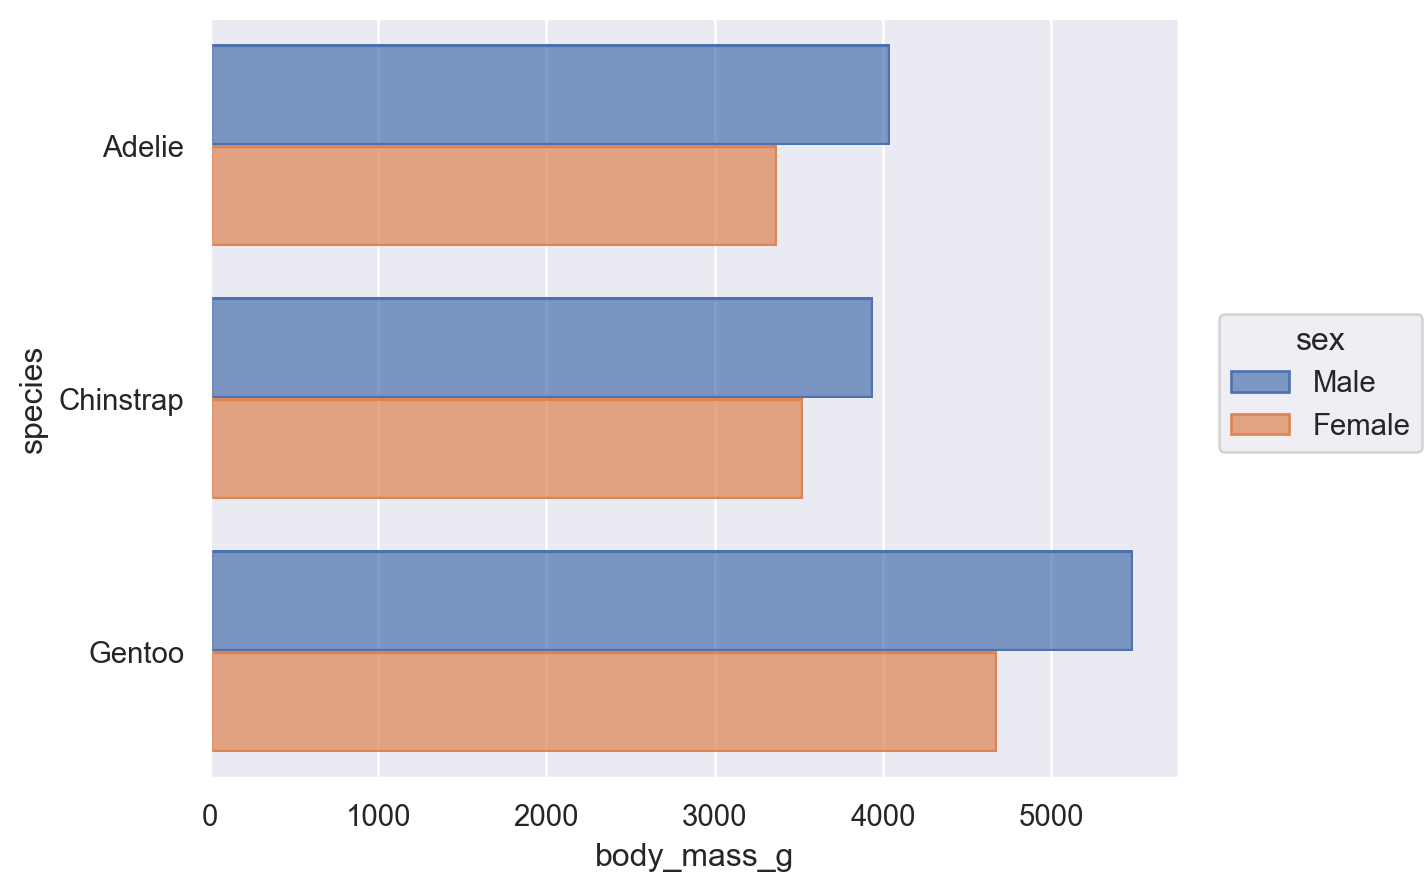

In [23]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge())
)

x, y 변수가 모두 숫자일 때와 같은 경우 올바른 방향이 모호합니다. 이러한 경우 `Plot.add()`에 orient 매개변수를 전달하여 명시적으로 지정할 수 있습니다.

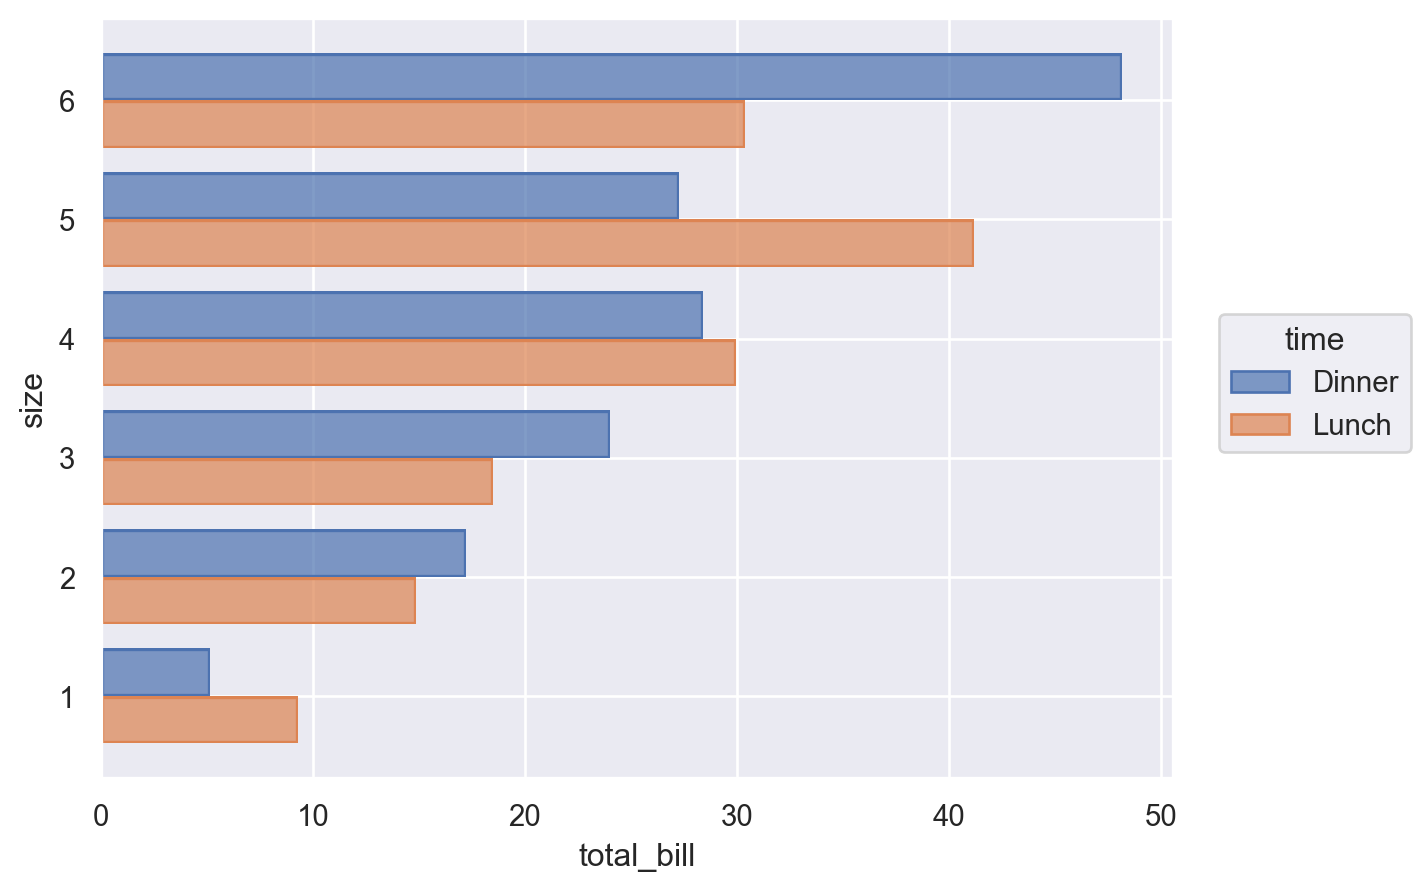

In [24]:
tips = sns.load_dataset("tips")

(
    so.Plot(tips, x="total_bill", y="size", color="time")
    .add(so.Bar(), so.Agg(), so.Dodge(), orient="y")
)

## Building and displaying the plot
위 예시는 모두 한가지 마크만 사용하였으나 더 다양한 마크 사용가능
### Adding multiple layers
Plot.add()를 여러번 호출해 더 복잡한 단일 서브플롯 그래픽 작성 가능하며, 호출될 때마다 플롯의 <i>레이어</i> 정의   
   
예시> 
1) Scatterplot(지금은 `Dots` 사용) 추가   
2) 회귀선 추가

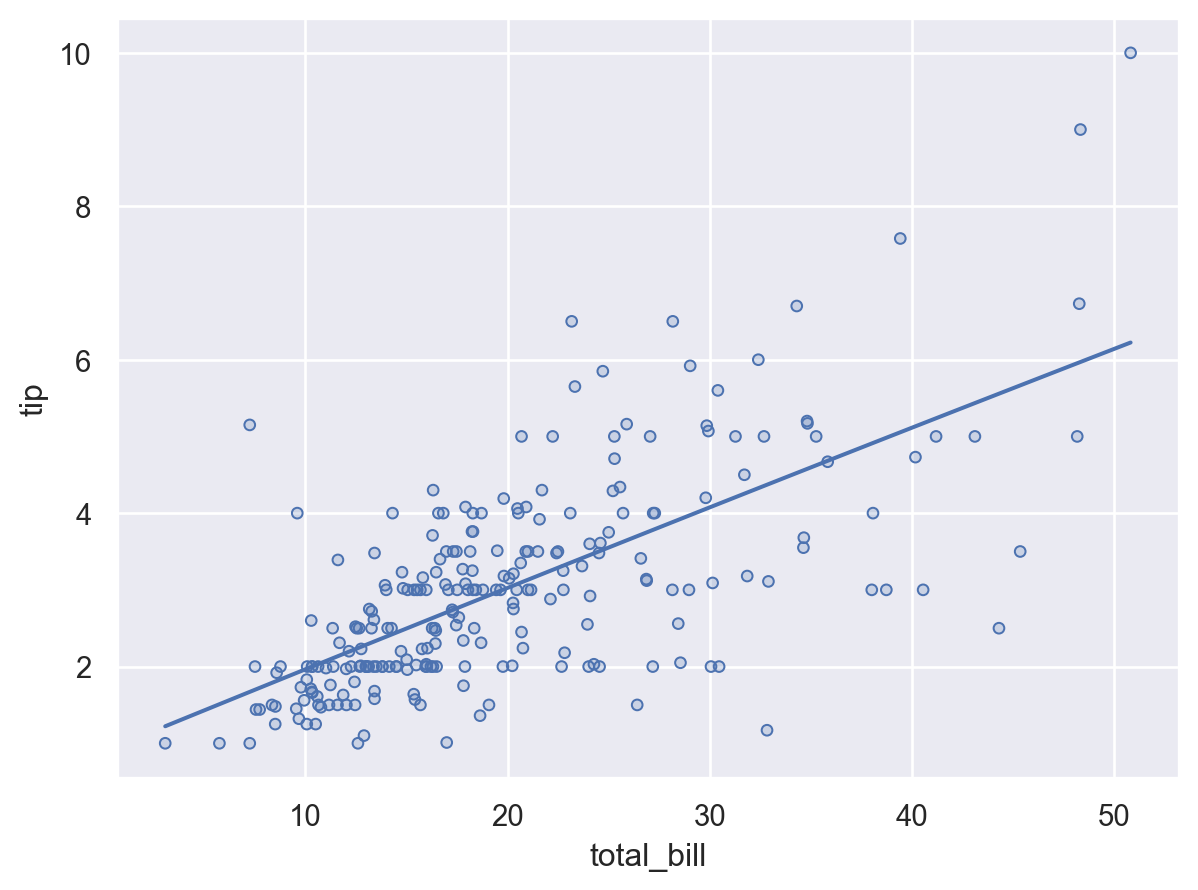

In [25]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit()) # 회귀선 추가 코드
)

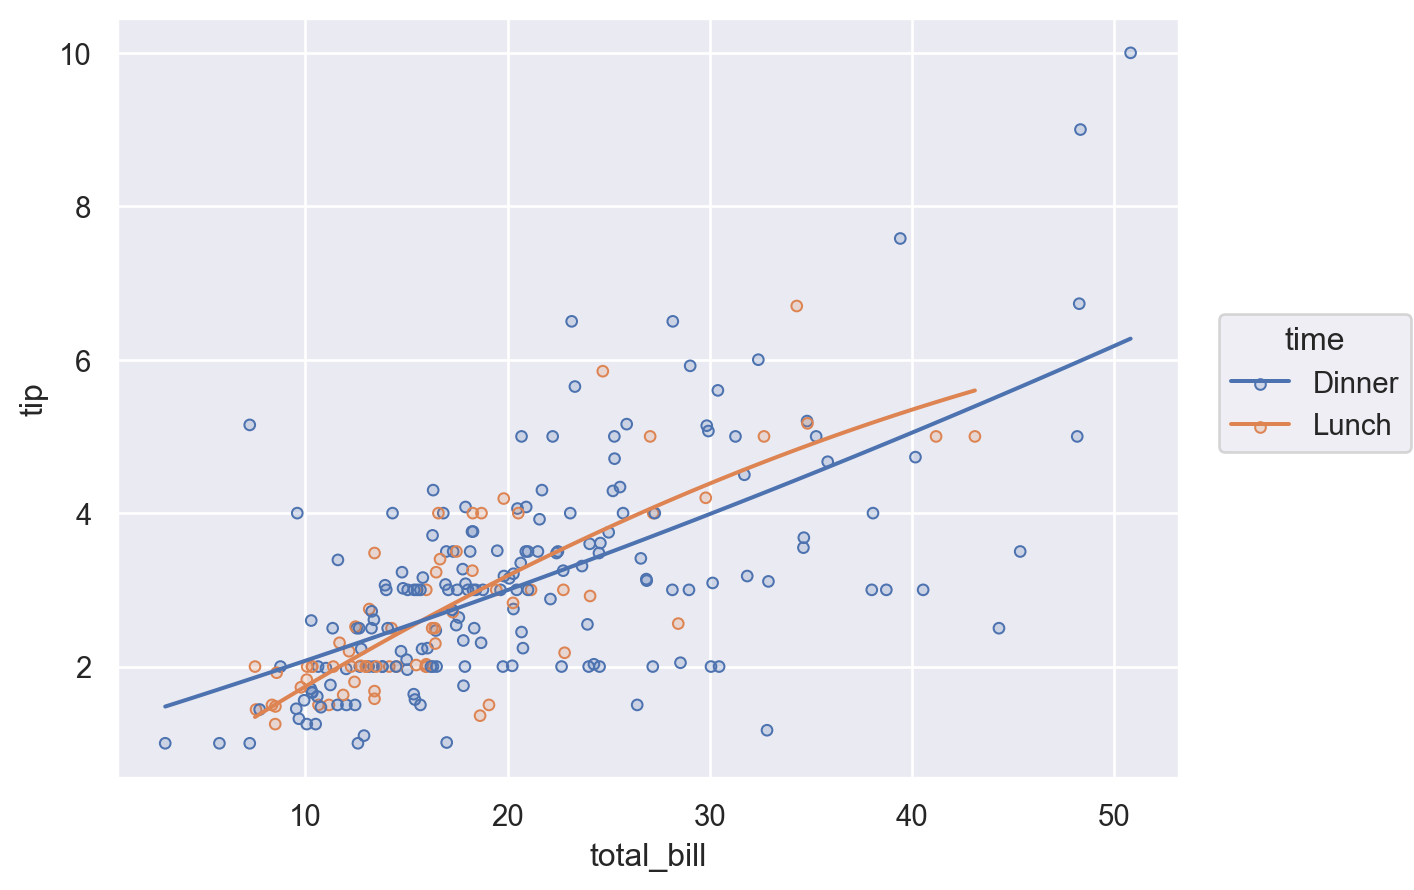

In [26]:
# Plot 생성자에 정의된 변수 매핑은 모든 레이어에 적용
(
    so.Plot(tips, x="total_bill", y="tip", color="time") #위 내용에서 color 속성에 time 변수 매핑
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

### Layer-specific mappings
##### 레이어별 매핑
특정 레이어에서만 사용되도록 매핑 정의 가능    
Plot.add 호출 시 관련 레이어에 대한 매핑을 정의하여 수행

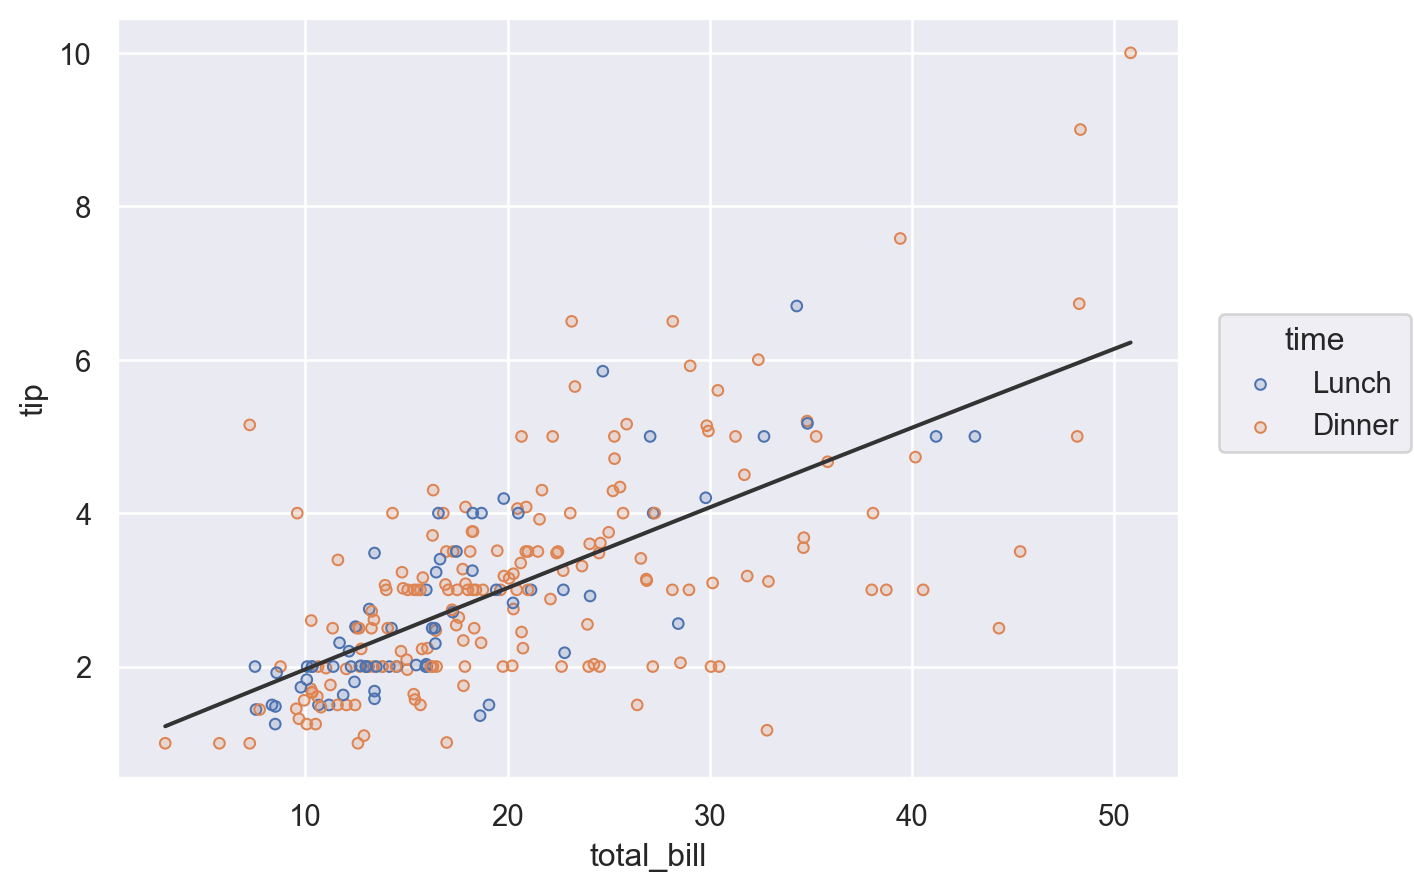

In [27]:
# 컬러 추가
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dots(), color="time")
    .add(so.Line(color=".2"), so.PolyFit()) # color=".2" : 선 색 검은색으로 지정(1로 갈수록 하얌)
)

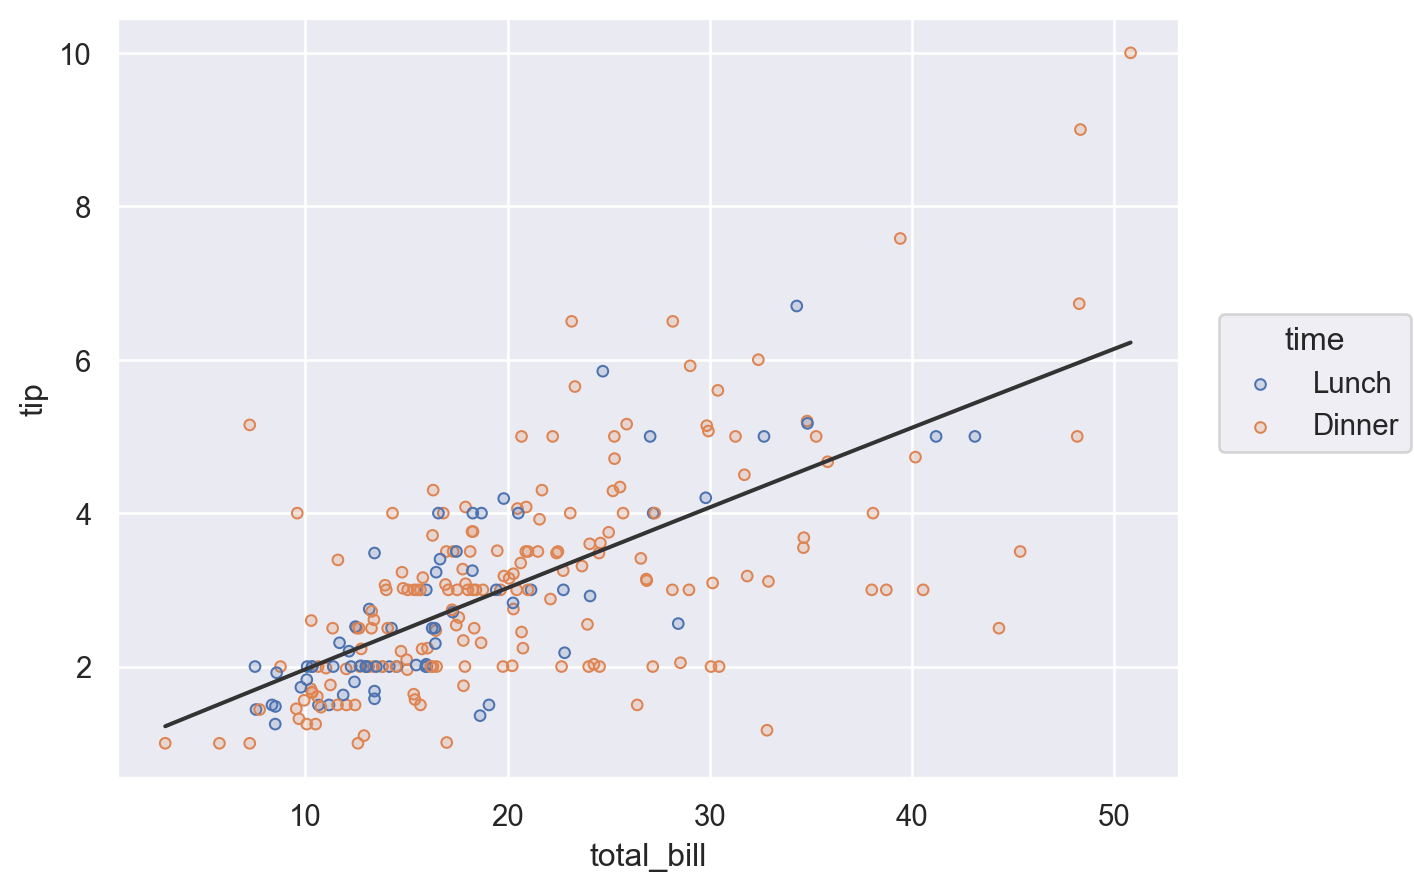

In [28]:
# 전체 플롯에 대한 레이어 정의하되, 변수를 없음으로 설정하여 특정 레이어에서 제거
(
    so.Plot(tips, x="total_bill", y="tip", color="time")
    .add(so.Dots())
    .add(so.Line(color=".2"), so.PolyFit(), color=None) #위 Dots에는 컬러 속성대로 디너, 런치 색상 차이가 있으나, 회귀선은 각각 그리지 않고 전체에 대해 하나만 그림
)

마크 속성 값 지정 방법(아래 이미지 참고)   
   
**<span style= 'color:#4C72B0'>1) 모든 레이어의 변수를 매핑</span>   
<span style= 'color:#E19468'>2) 특정 레이어의 변수를 매핑</span>   
<span style= 'color:#55A868'>3) 속성을 직접 설정</span>**


![nn](../img/so_mapping.png)

### Faceting and pairing subplots
##### 패싯, 페어링 서브플롯

seaborn의 figure-level 함수(`displot()`, `catplot()` 등)와 마찬가지로 `Plot` 인터페이스는 데이터의 하위 집합을 포함하는 하위 그림 또는 여러 "패싯"이 있는 그림을 생성할 수도 있습니다. 이는 `Plot.facet()` 메서드를 사용하여 수행됩니다.

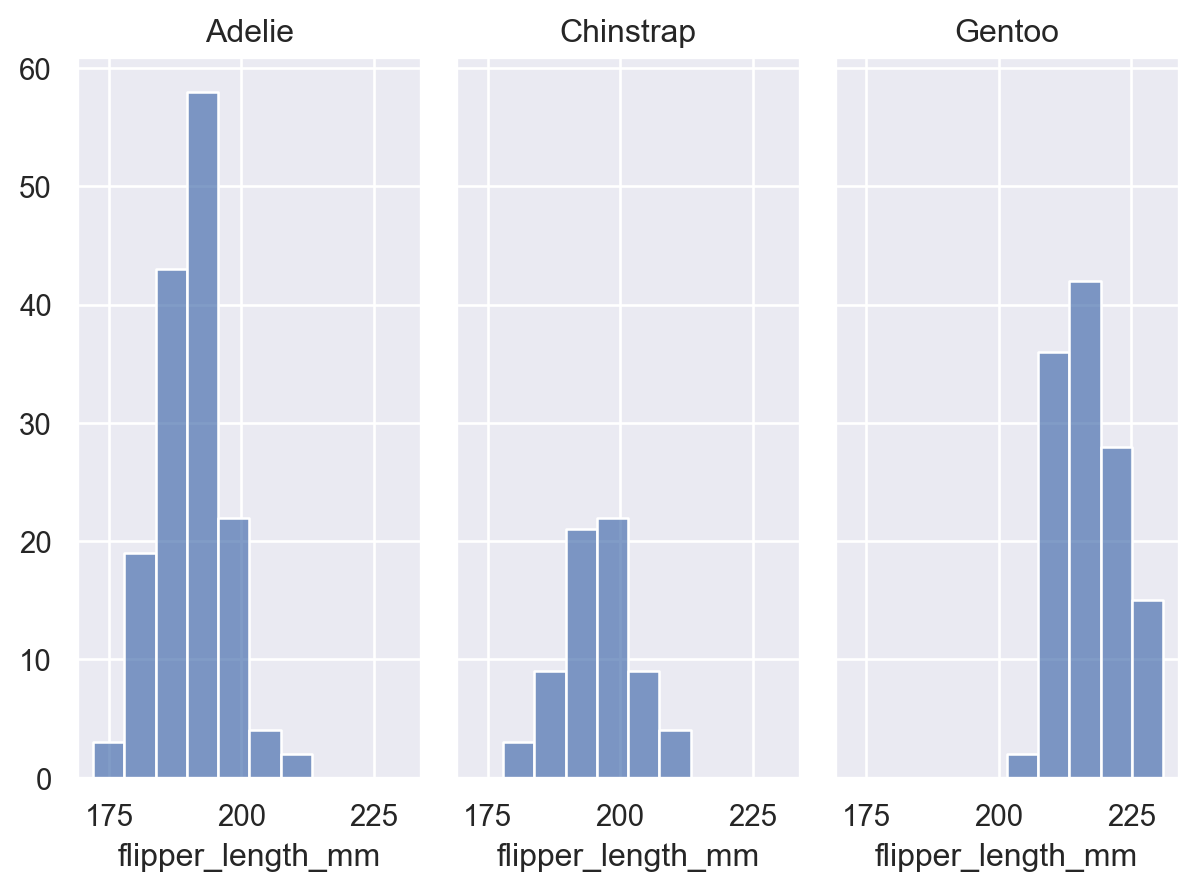

In [29]:
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet("species")
    .add(so.Bars(), so.Hist())
)

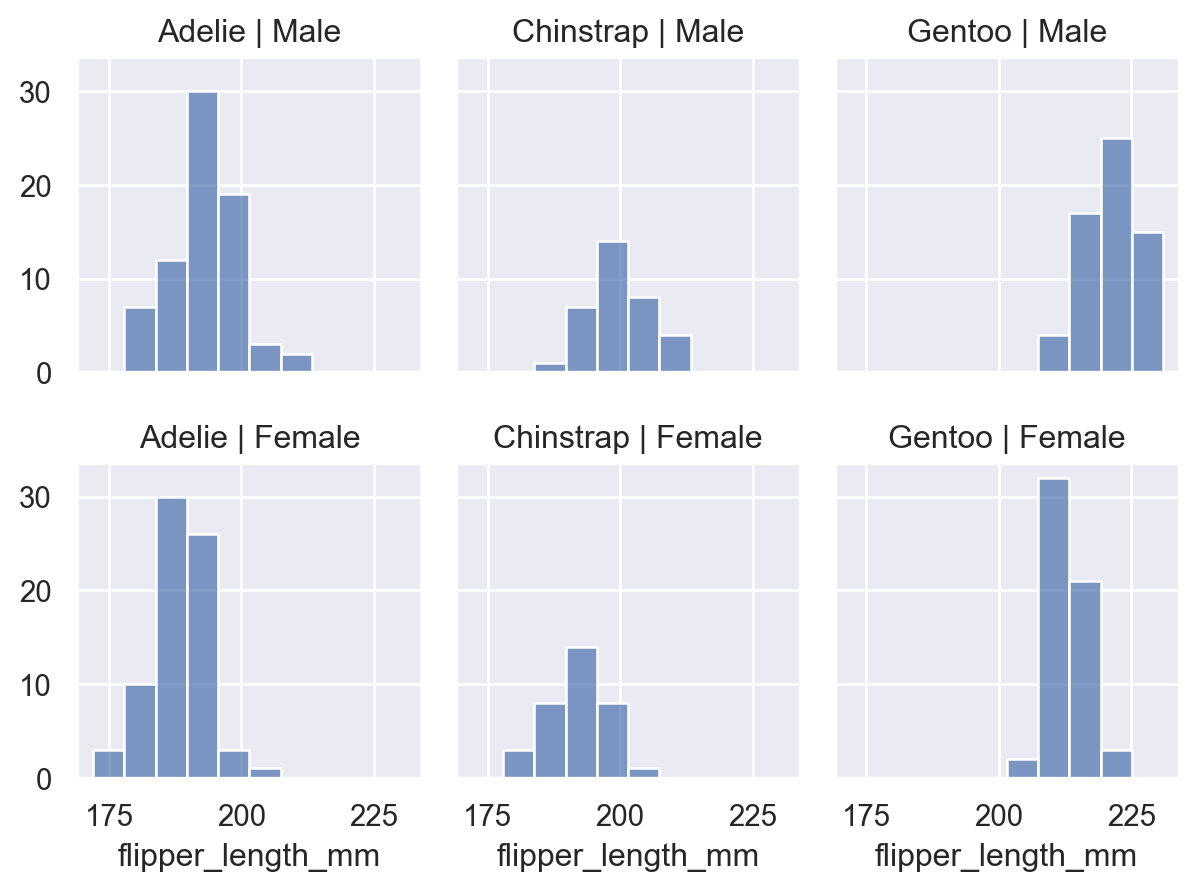

In [30]:
# 플롯의 열 및/또는 행을 정의하는 데 사용해야 하는 변수와 함께 Plot.facet() 호출
(
    so.Plot(penguins, x="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

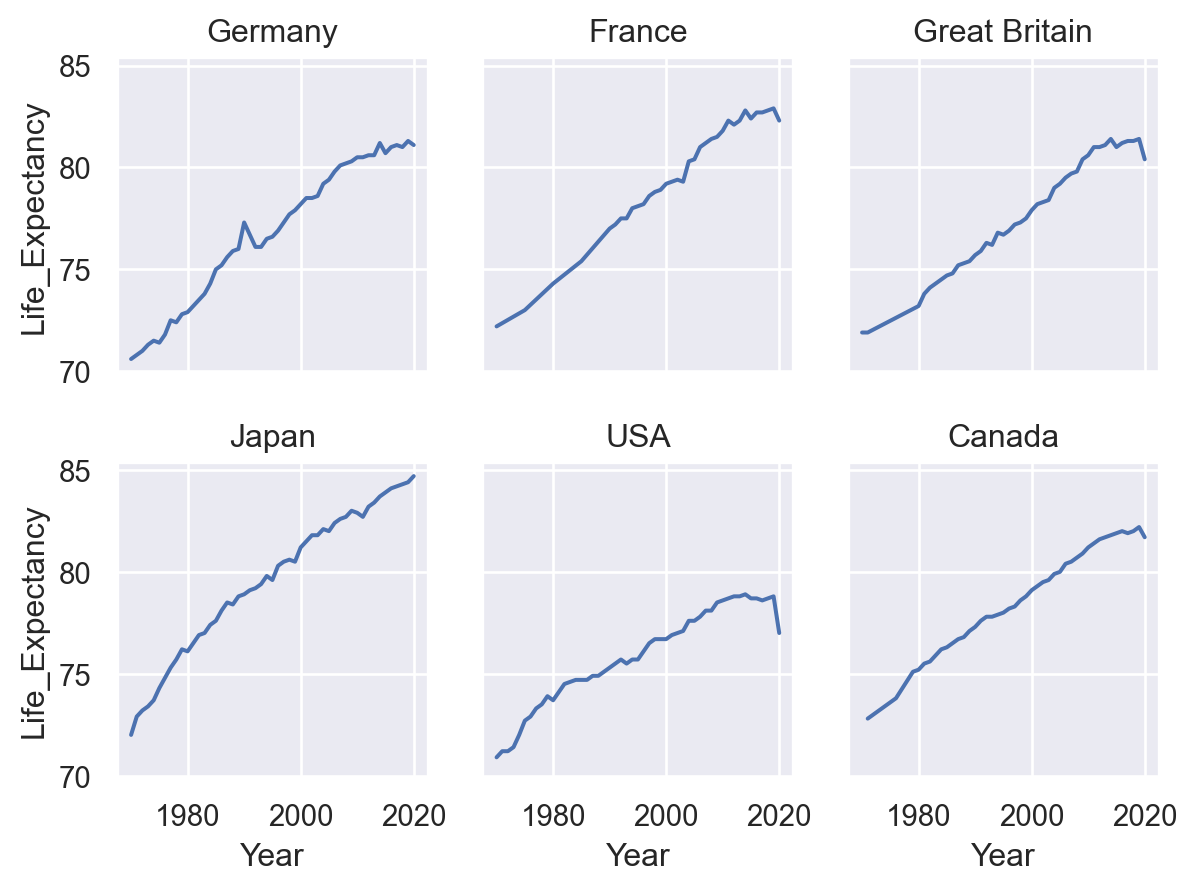

In [31]:
# 다른 차원에 걸쳐 "래핑"하여 수준 수가 더 많은 변수를 사용하여 패싯 가능
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .facet(col="Country", wrap=3)
    .add(so.Line())
)

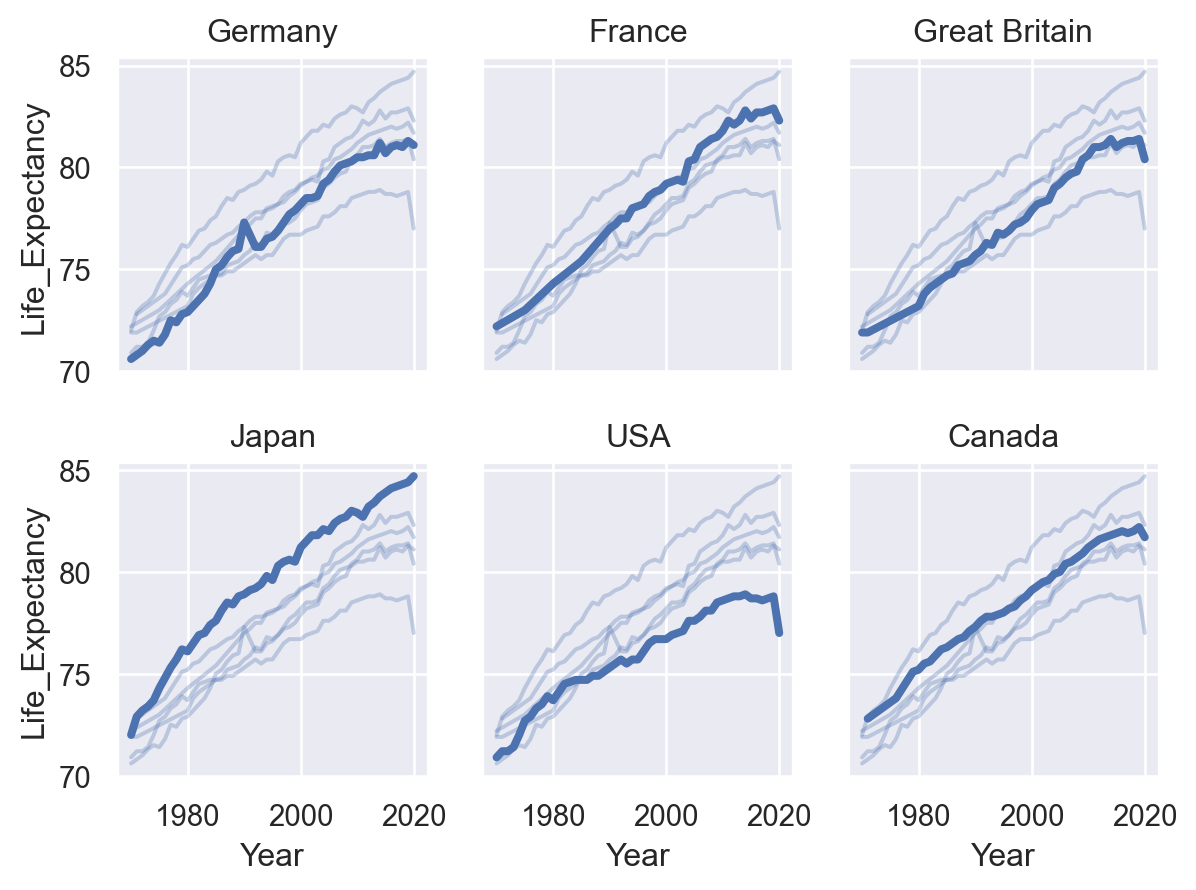

In [32]:
# 레이어를 따로 제외하지 않는 한 모든 레이어에 패싯. 각 서브플롯에 추가 컨텍스트를 제공하는 데 유용
(
    so.Plot(healthexp, x="Year", y="Life_Expectancy")
    .facet("Country", wrap=3)
    .add(so.Line(alpha=.3), group="Country", col=None) # col 속성 제거시 평균선만 나옴
    .add(so.Line(linewidth=3)) # 선두께 설정
)

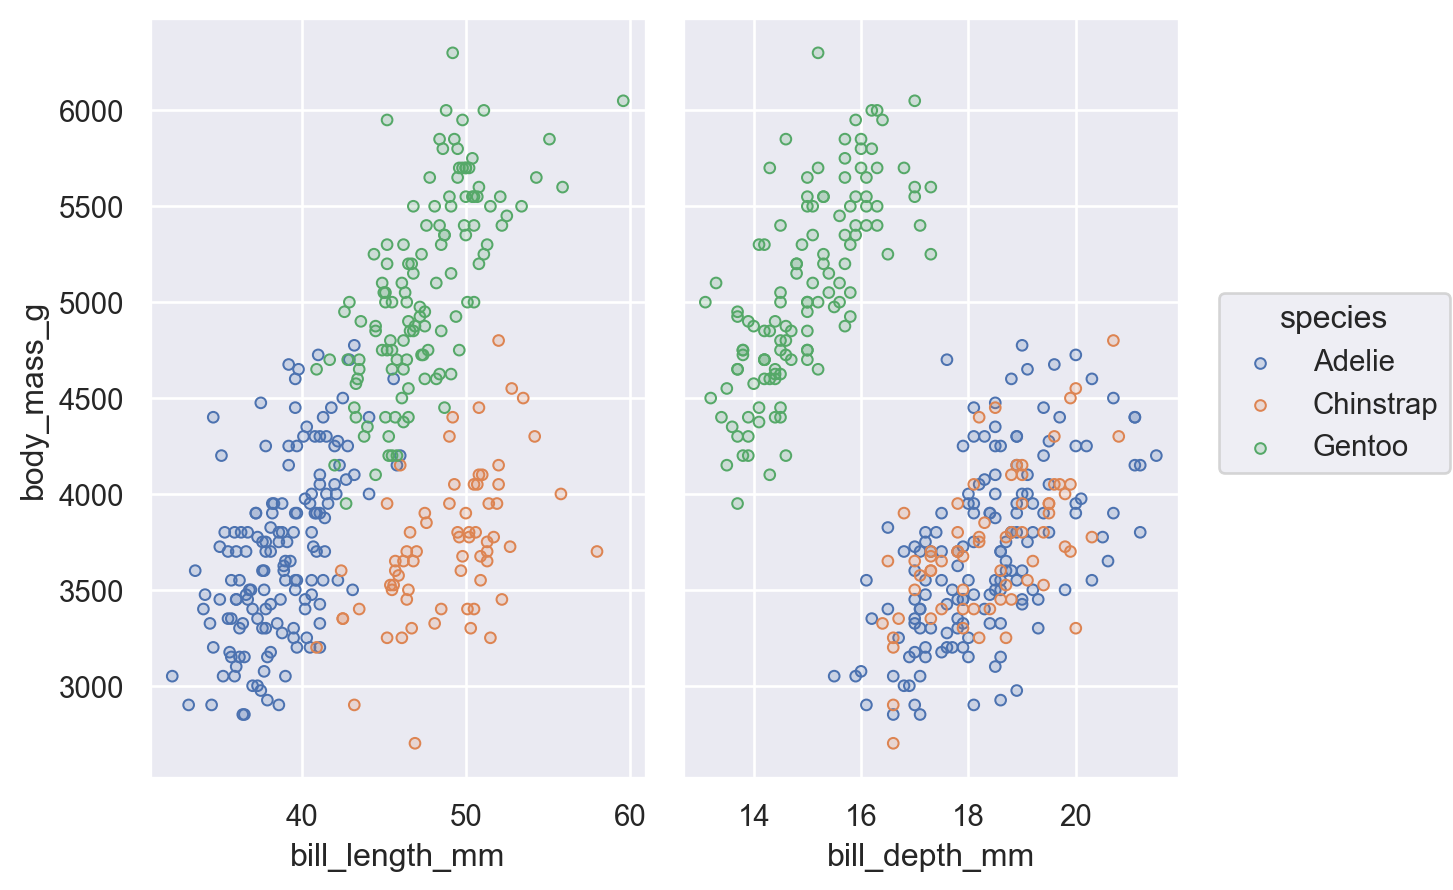

In [33]:
# 서브플롯을 생성하는 다른 방법은 Plot.pair()입니다. seaborn.PairGrid와 마찬가지로 x 및/또는 y 좌표에 대해 서로 다른 변수를 사용하여 각 서브플롯에 모든 데이터를 그립니다.
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .add(so.Dots())
)

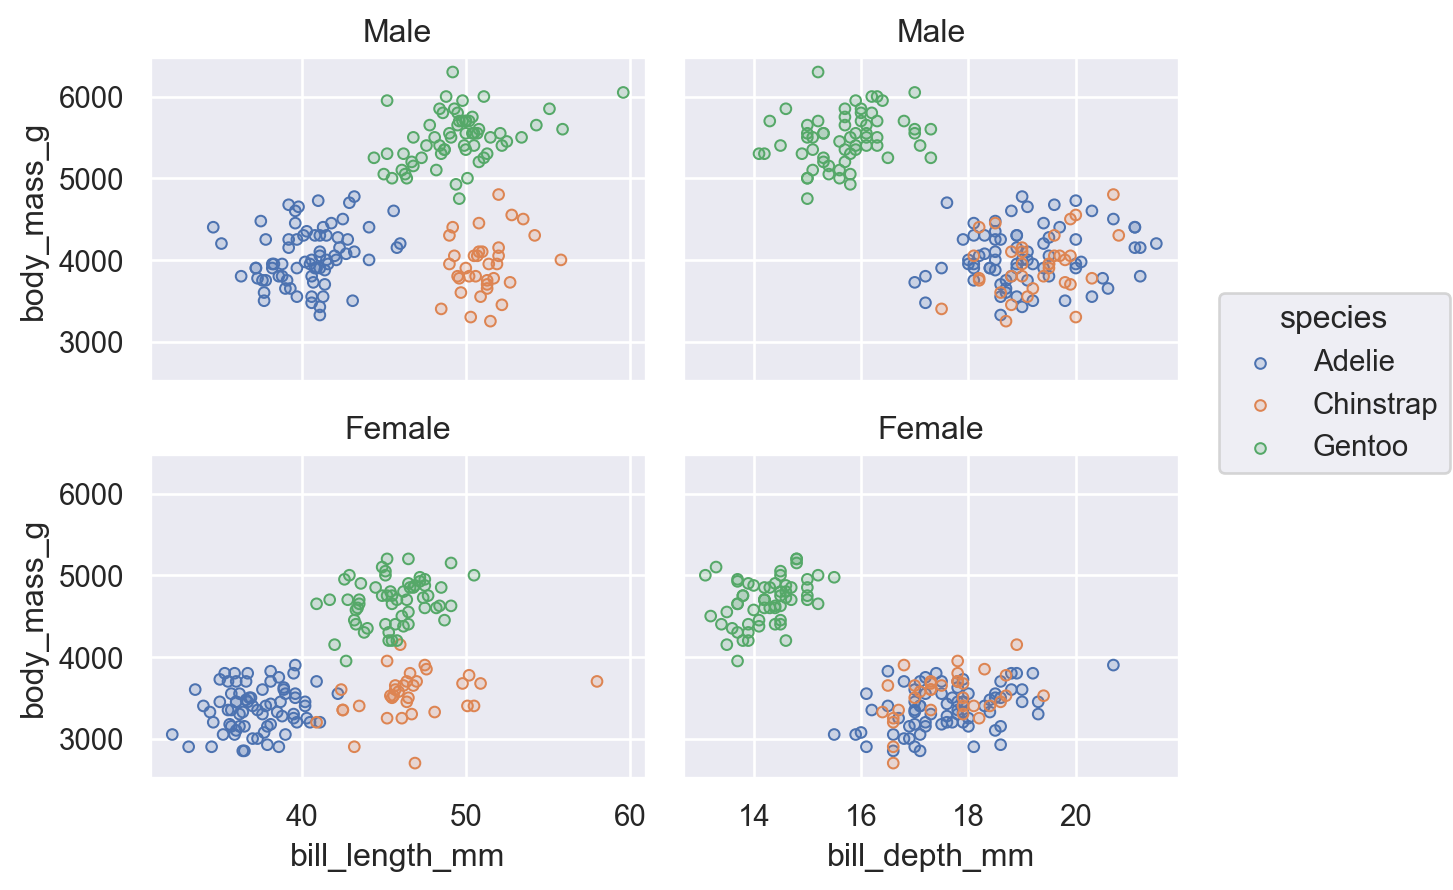

In [34]:
# 작업에서 반대 차원에 서브플롯을 추가하기만 하면 패싯과 페어링을 결합할 수 있습니다.
(
    so.Plot(penguins, y="body_mass_g", color="species")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="sex")
    .add(so.Dots())
)

**seaborn 서브플롯 그리기**

1.   
.facet   
ex1) .facet('변수명')   
ex2) .facet(col='변수1', row='변수2')   
ex3) .facet('변수명', wrap=래핑할 숫자)   
<br>
<br>
2.   
.pair   
PairGrid와 마찬가지로 x, y좌표에 서로 다른 변수를 설정해 서브플롯 작성   
.pair(x=['변수1', '변수2'])   
<br>
<br>
3.   
섞어 사용   
.pair(x=['변수1', '변수2'])   
.facet('변수3')   

### Integrating with matplotlib
##### matplotlib과의 통합
   
`Plot.facet()` 또는 `Plot.pair()`가 제공할 수 있는 것보다 더 복잡한 구조를 가진 그림에 여러 서브플롯을 표시하려는 경우가 있을 수 있습니다. 현재 솔루션은 그림 설정을 matplotlib에 위임하고 `Plot`이 `Plot.on()` 메서드와 함께 사용해야 하는 matplotlib 객체를 제공하는 것입니다. 이 객체는 `matplotlib.axes.Axes`, `matplotlib.figure.Figure` 또는 `matplotlib.figure.SubFigure`일 수 있습니다. 후자는 맞춤형 서브플롯 레이아웃을 구성하는 데 가장 유용합니다.

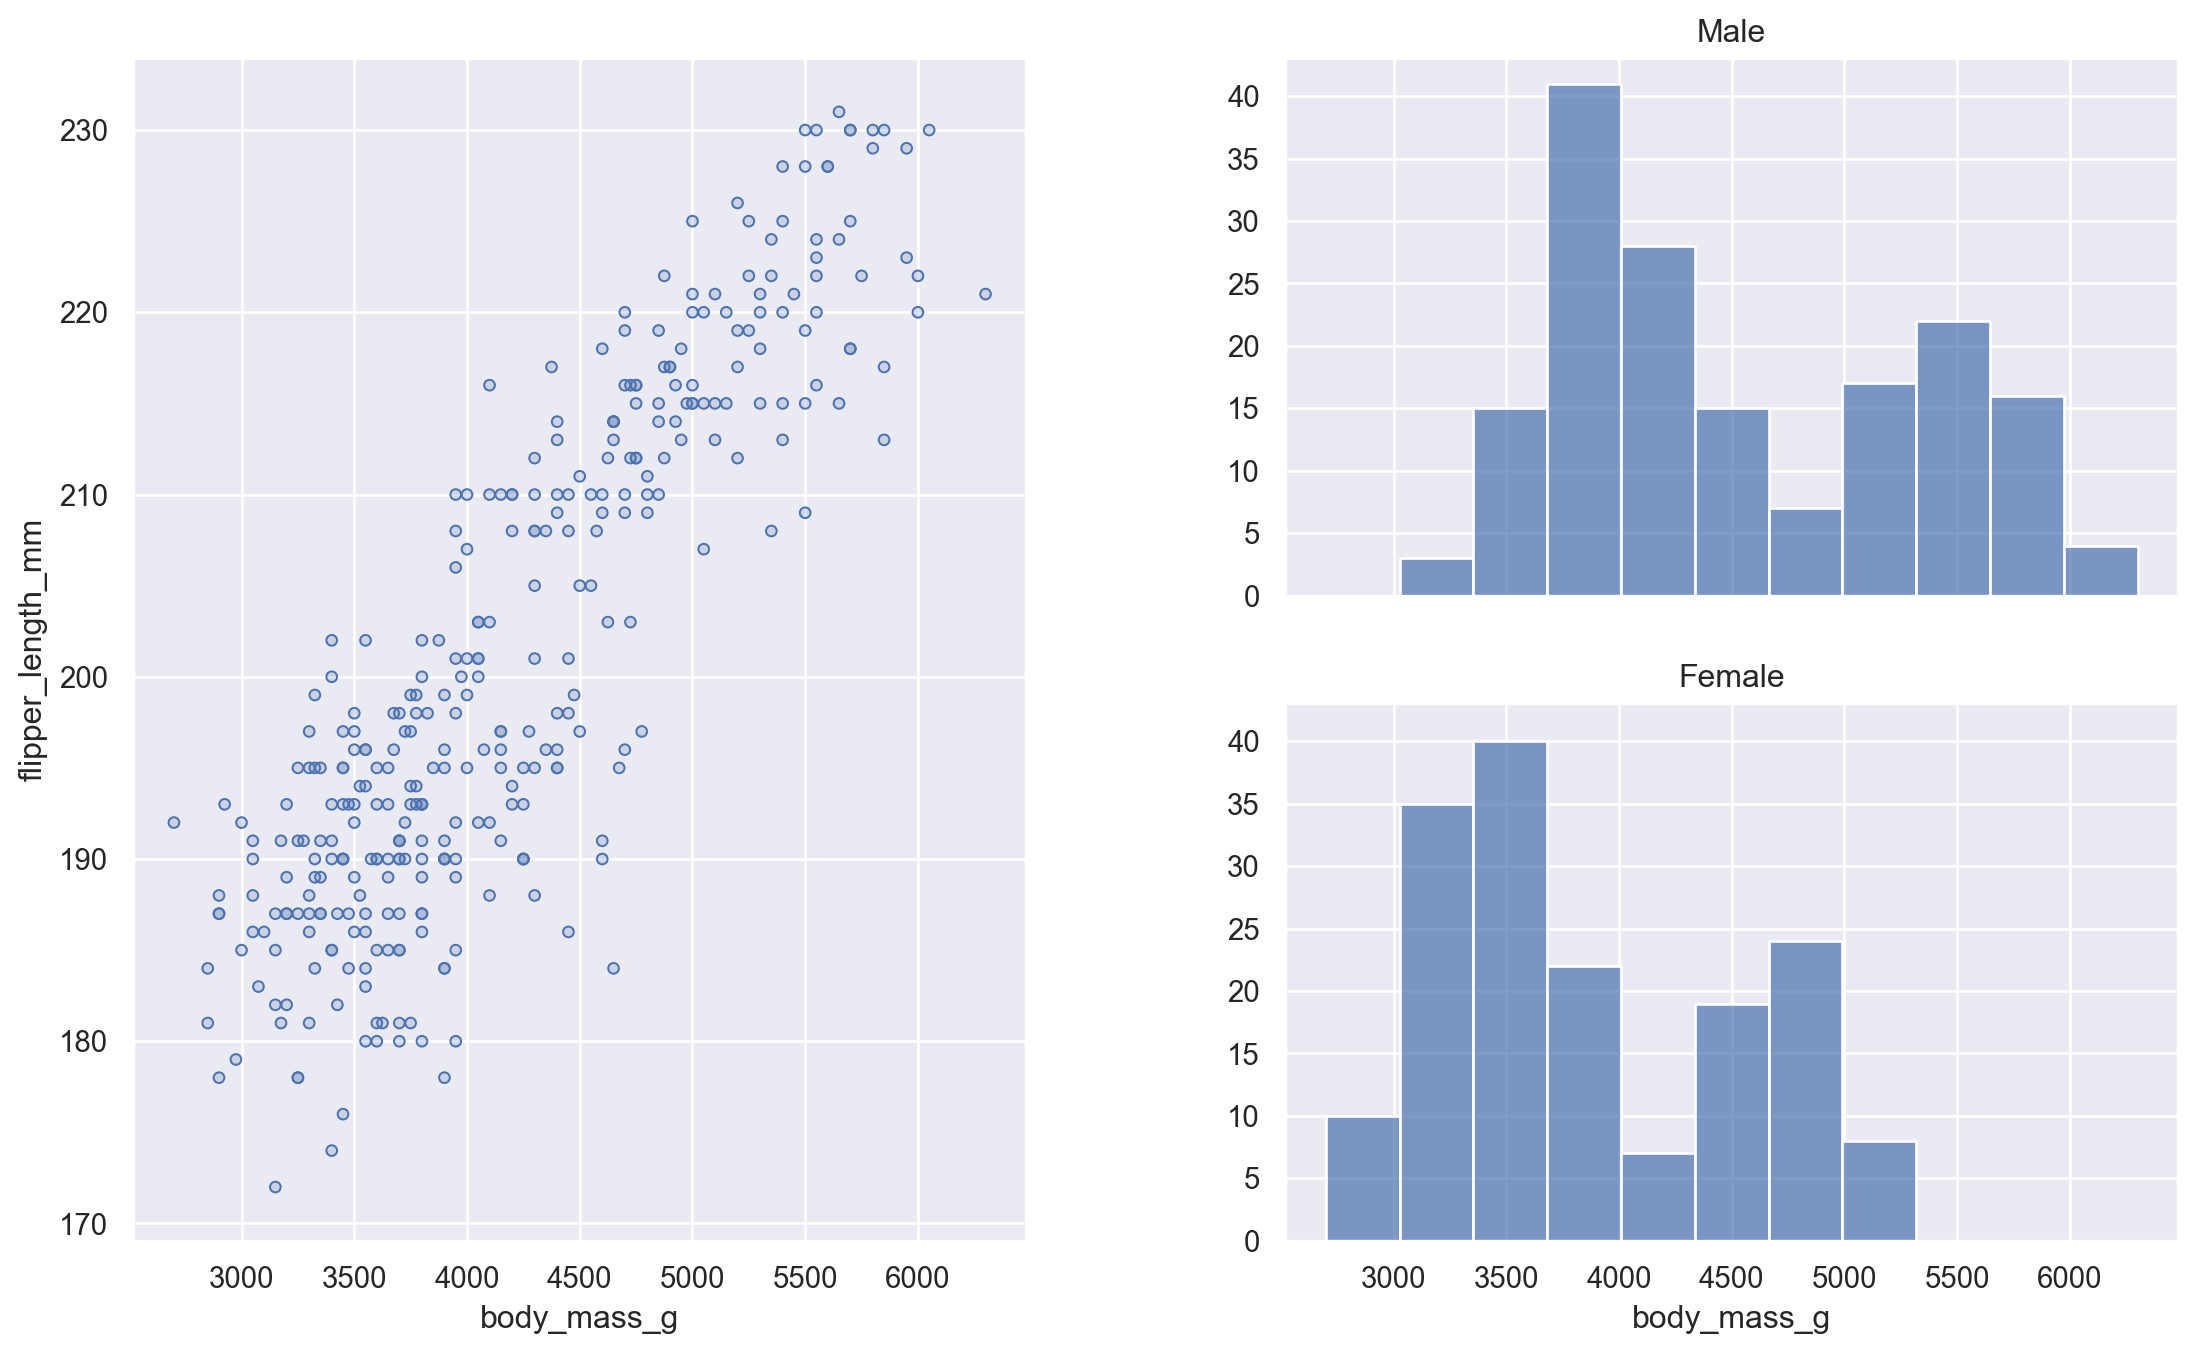

In [35]:
import matplotlib as mpl

f = mpl.figure.Figure(figsize=(12, 8))
sf1, sf2 = f.subfigures(1, 2)

(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dots())
    .on(sf1)
    .plot()
)
(
    so.Plot(penguins, x="body_mass_g")
    .facet(row="sex")
    .add(so.Bars(), so.Hist())
    .on(sf2)
    .plot()
)

**복잡한 서브플롯 그리기**

위 방법으로 그리기 어려운 경우 .on 메서드로 matplotlib 오브젝트 활용

사용할 수 있는 대표적인 mpl오브젝트: `matplotlib.axes.Axes`, `matplotlib.figure.Figure`, **`matplotlib.figure.SubFigure`**

### Building and displaying the plot
알아야 할 중요한 점은 `Plot` 메서드가 호출된 개체를 복제하고 개체를 제자리에서 업데이트하는 대신 해당 **복제본을 반환**한다는 것입니다.    
즉, 일반적인 플롯 사양을 정의한 다음 이에 대한 여러 변형을 생성할 수 있습니다.

In [36]:
# 기본 플롯 설정
p = so.Plot(healthexp, "Year", "Spending_USD", color="Country")

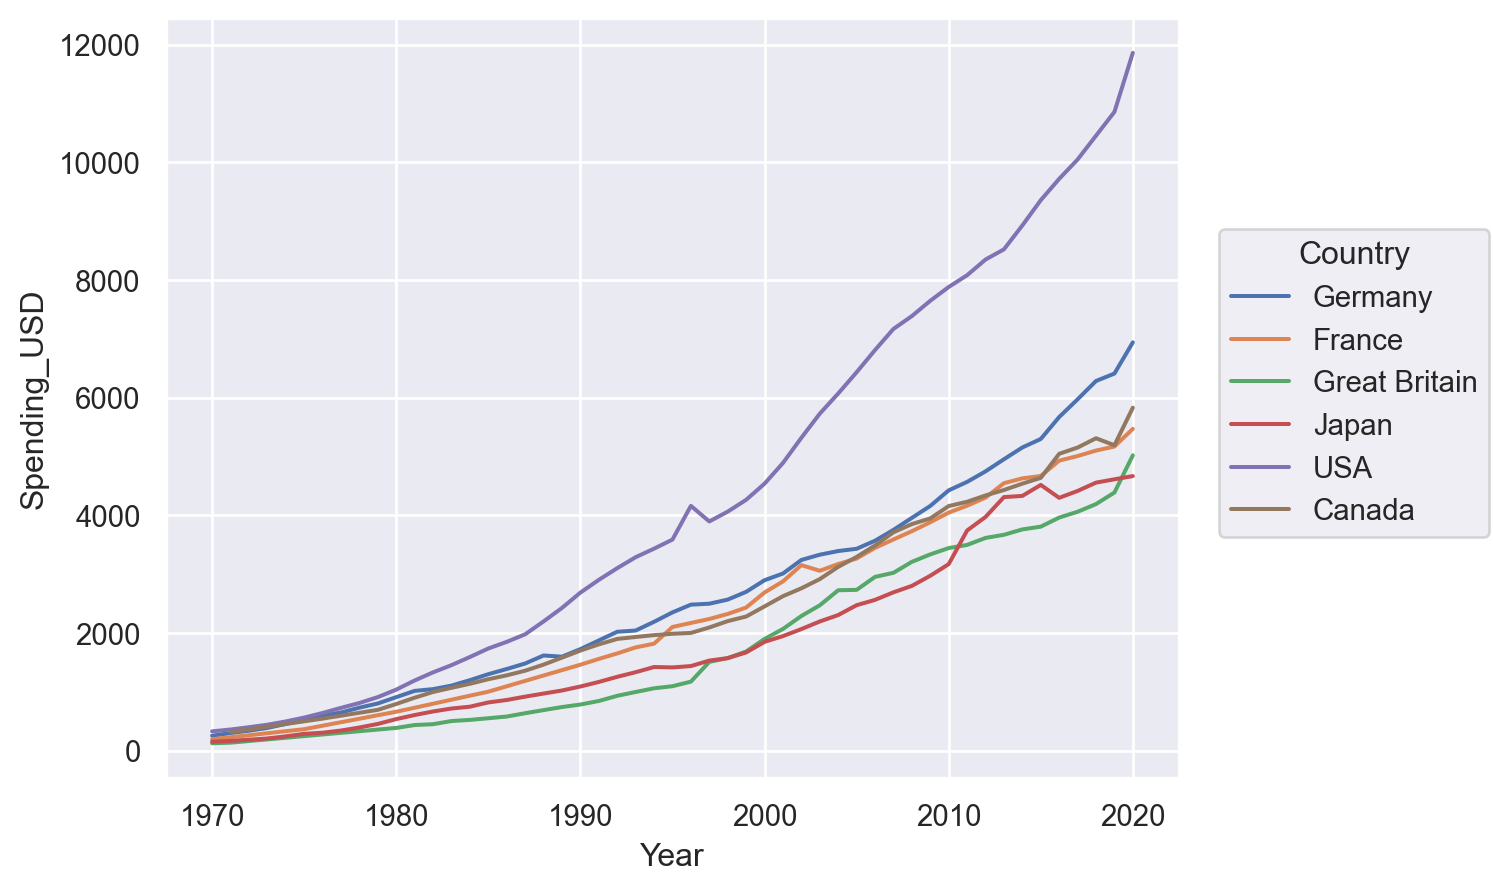

In [37]:
# 라인플롯
p.add(so.Line())

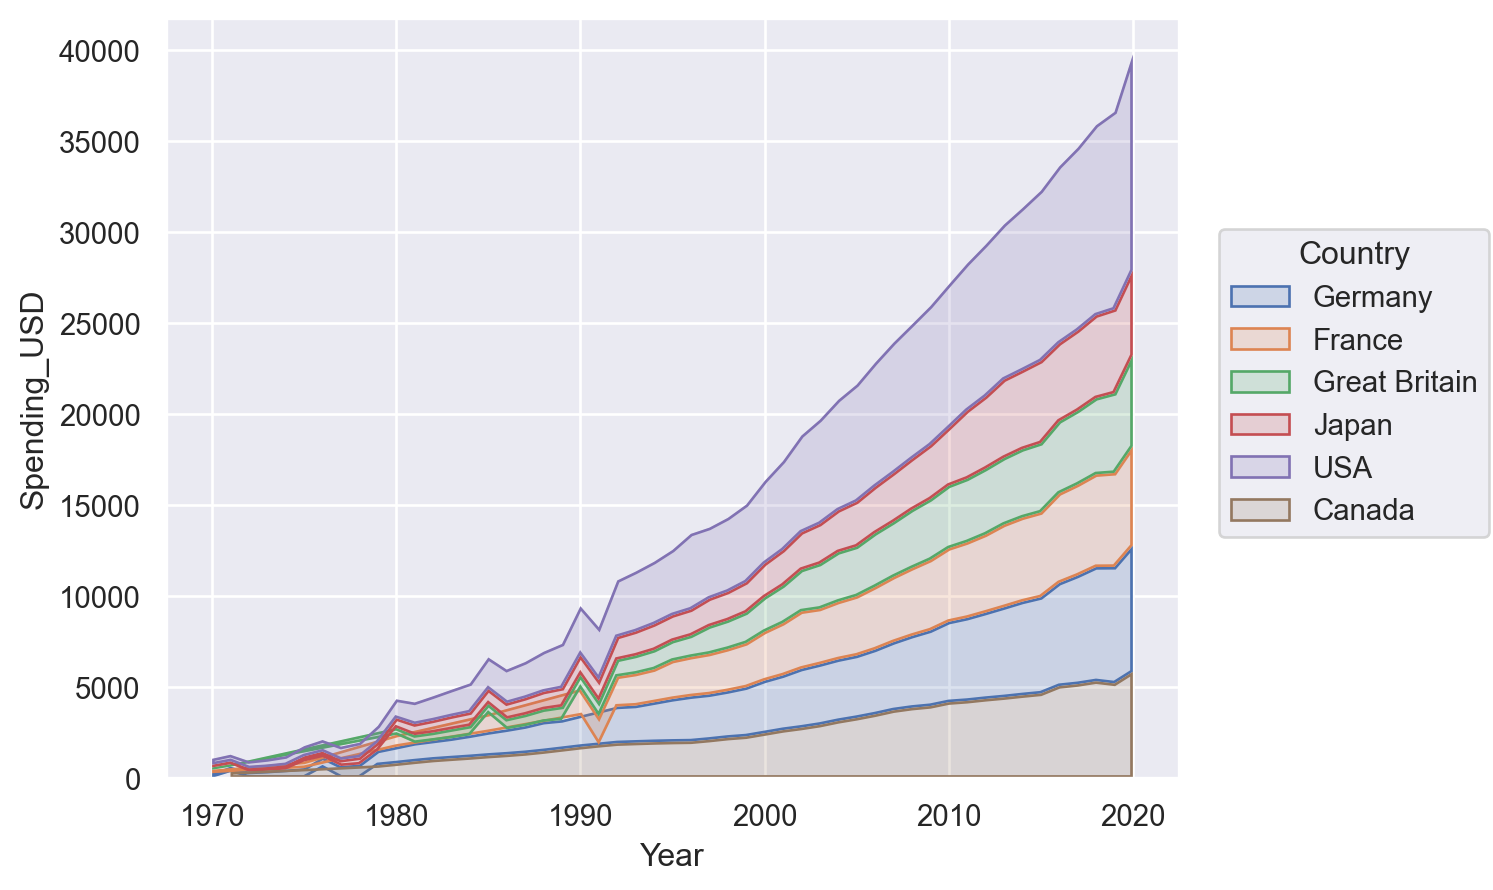

In [38]:
# 누적영역플롯
p.add(so.Area(), so.Stack())

Plot 메서드는 완전히 선언적입니다. 그것들을 호출하면 플롯 사양이 업데이트되지만 실제로 플로팅을 수행하지는 않습니다.    
이것의 한 가지 결과는 메서드가 임의의 순서로 호출될 수 있고 많은 메서드가 여러 번 호출될 수 있다는 것입니다.

플롯은 실제로 언제 렌더링됩니까? 플롯은 노트북 환경에서 사용하기에 최적화되어 있습니다.   
플롯이 Jupyter REPL* 에 표시되면 렌더링이 자동으로 트리거됩니다.   
그렇기 때문에 플롯을 정의했지만 REPL로 반환하지 않고 p에 할당한 위의 예에서 아무 것도 볼 수 없었습니다.

노트북에서 플롯을 보려면 셀의 마지막 줄에서 `Plot`을 반환하거나 개체에서 Jupyter의 `display` 기능을 호출하십시오.   
노트북 통합은 `matplotlib.pyplot`을 완전히 우회하지만 `Plot.show()`를 호출하여 다른 컨텍스트에서 그림 표시 장치를 사용할 수 있습니다.

`Plot.save()`를 호출하여 플롯을 파일(또는 버퍼)에 저장할 수도 있습니다.

*REPL은 Read-Eval-Print-Loop의 약자로 사용자와 마치 문답을 주고받듯이 동작하는 프로그램   
애플리케이션 실행 상태에서 사용자가 입력한 명령어(소스코드)를 읽고(Read) 명령어를 평가(Eval)하고 결과를 출력(Print)한 다음 다시 입력을 기다리는 상태로 돌아가는 과정을 반복(Loop)합니다.

## Customizing the appearance
##### 형태 커스터마이징
새로운 인터페이스는 Plot을 통해 많은 양의 사용자 정의를 지원하여 기어를 전환하고 matplotlib 기능을 직접 사용할 필요성을 줄이는 것을 목표로 합니다.
(하지만 기다려주십시오. 이 목표를 달성하는 데 필요한 모든 기능이 구현된 것은 아닙니다!)

### Parameterizing scales
##### 척도 파라미터화
모든 데이터 종속 속성은 Scale 및 Plot.scale() 메서드의 개념으로 제어됩니다.
이 메서드는 여러 가지 유형의 인수를 허용합니다. matplotlib에서 척도를 사용하는 것과 가장 가까운 한 가지 가능성은 좌표를 변환하는 함수의 이름을 전달하는 것입니다.

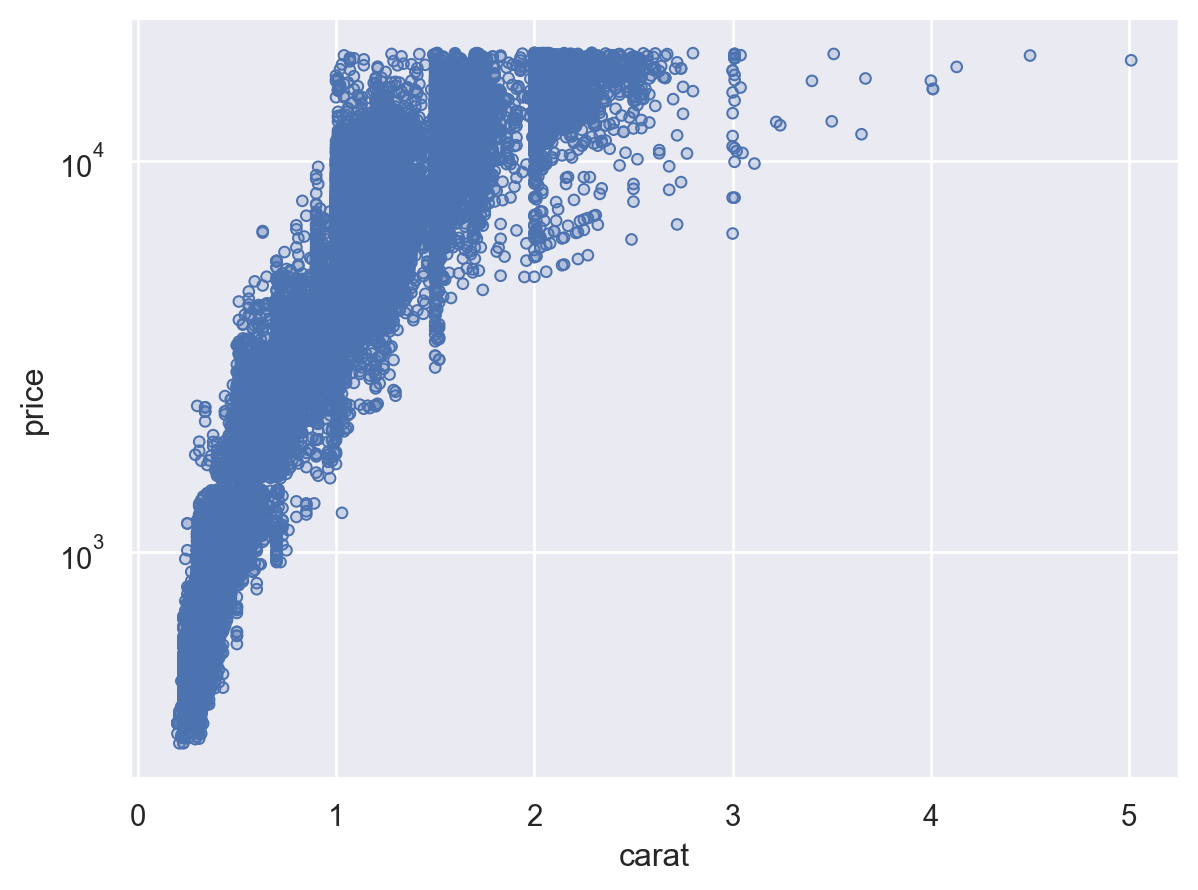

In [40]:
diamonds = sns.load_dataset("diamonds")

(
    so.Plot(diamonds, x="carat", y="price")
    .add(so.Dots())
    .scale(y="log")
)

`Plot.scale()`은 또한 색상과 같은 의미론적 속성에 대한 매핑을 제어할 수 있습니다.    
seaborn의 함수 인터페이스에서 `palette` 파라미터에 전달할 모든 인수를 직접 전달할 수 있습니다.

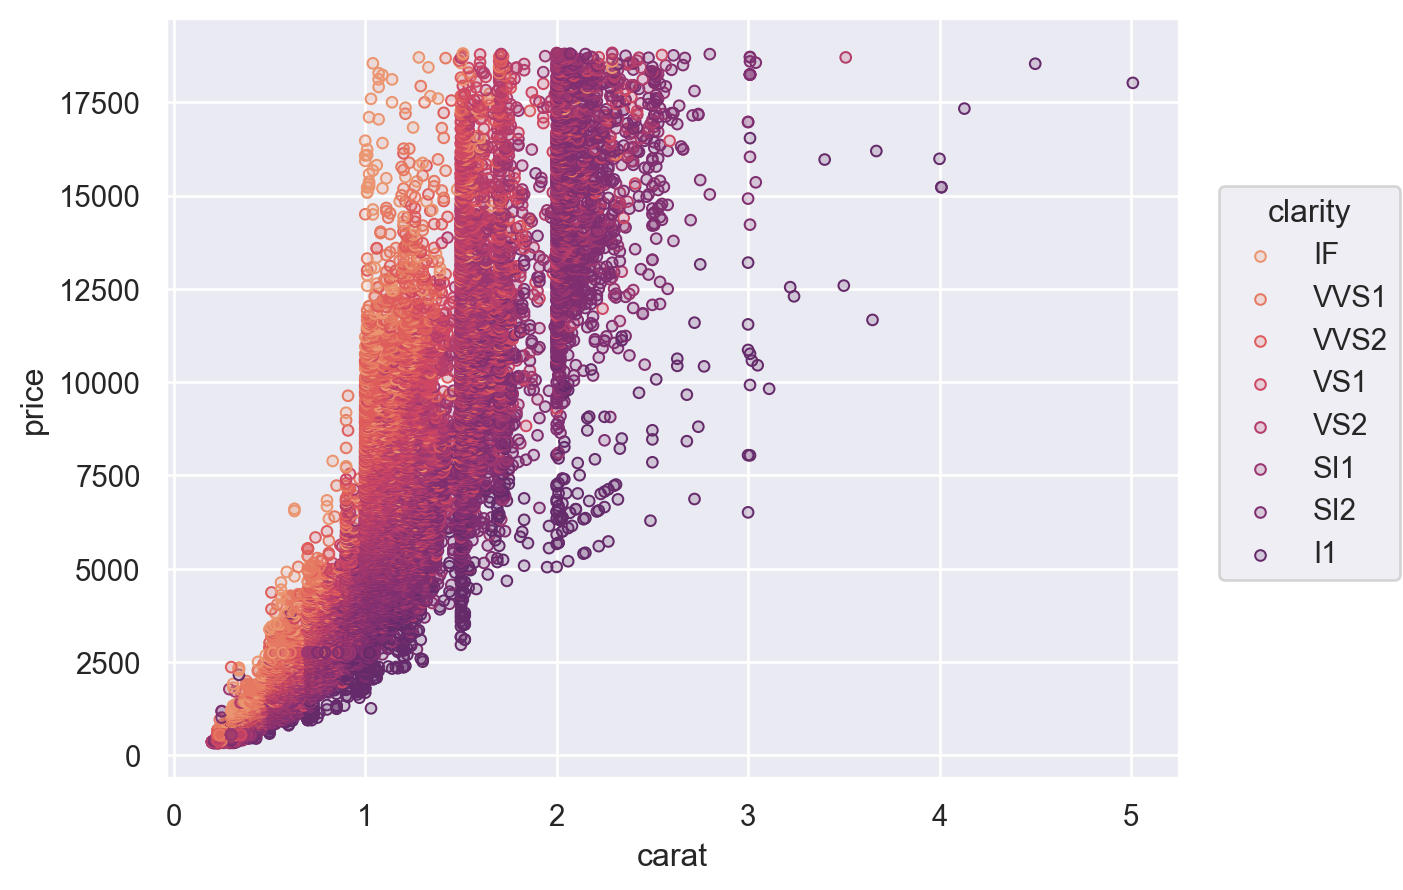

In [41]:
(
    so.Plot(diamonds, x="carat", y="price", color="clarity")
    .add(so.Dots())
    .scale(color="flare")
)

또 다른 옵션은 척도가 매핑되어야 하는 범위를 제어하는 (최소, 최대) 값의 튜플을 제공하는 것입니다. 이는 숫자 속성과 색상 모두에 적용됩니다.

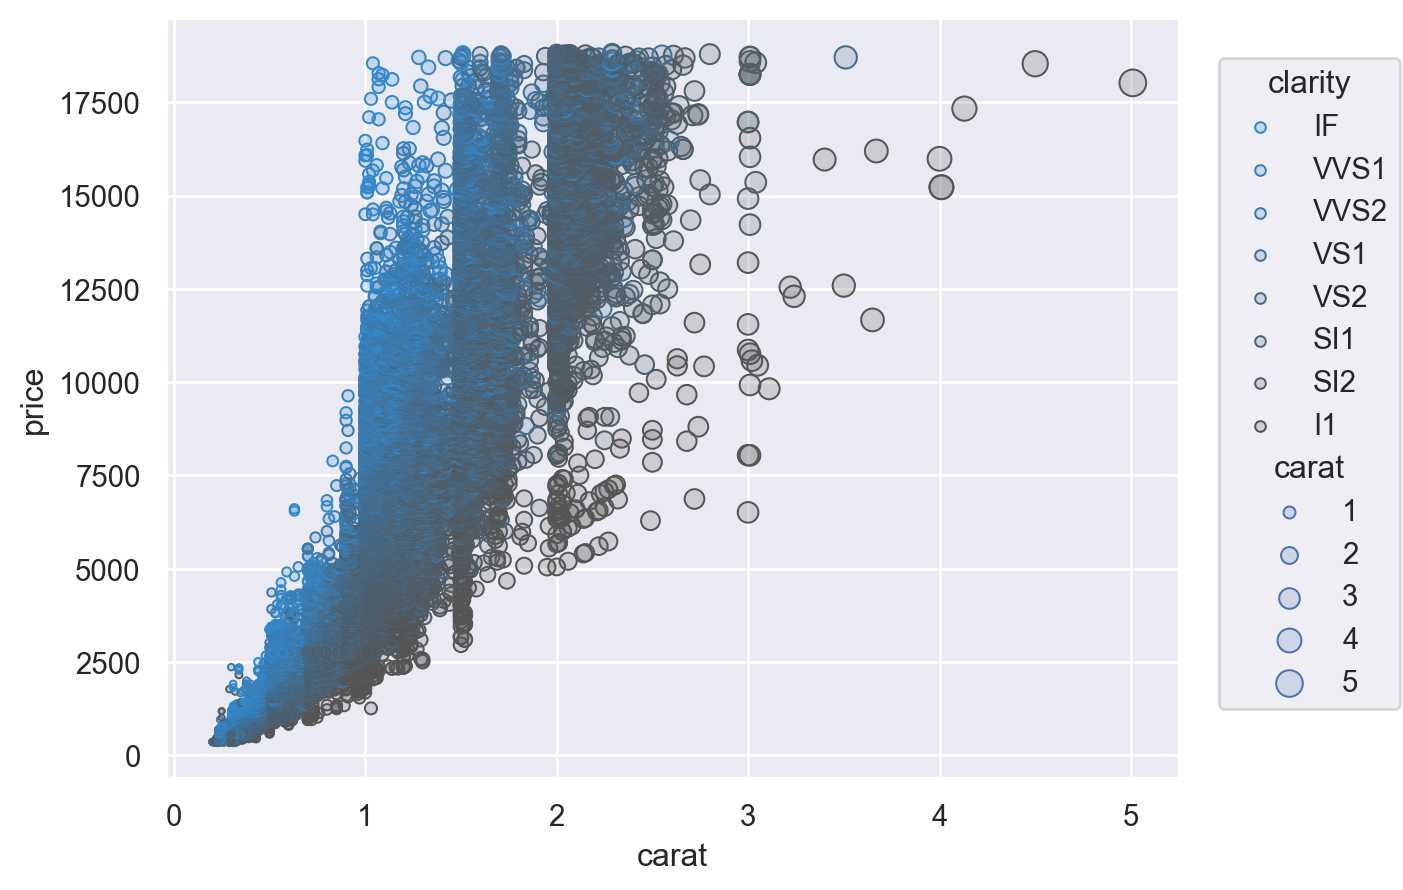

In [44]:
(
    so.Plot(diamonds, x="carat", y="price", color="clarity", pointsize="carat")
    .add(so.Dots())
    .scale(color=("#38c", "#555"), pointsize=(2, 10))
)

추가 제어를 위해 `Scale` 개체를 전달할 수 있습니다. 각각 적절한 파라미터가 있는 다양한 유형의 `Scale`이 있습니다.   
예를 들어 `Continuous`를 사용하면 입력 도메인(norm), 출력 범위(values) 및 이들 사이에 매핑되는 함수(trans)를 정의할 수 있으며 `Nominal`을 사용하면 순서를 지정할 수 있습니다.


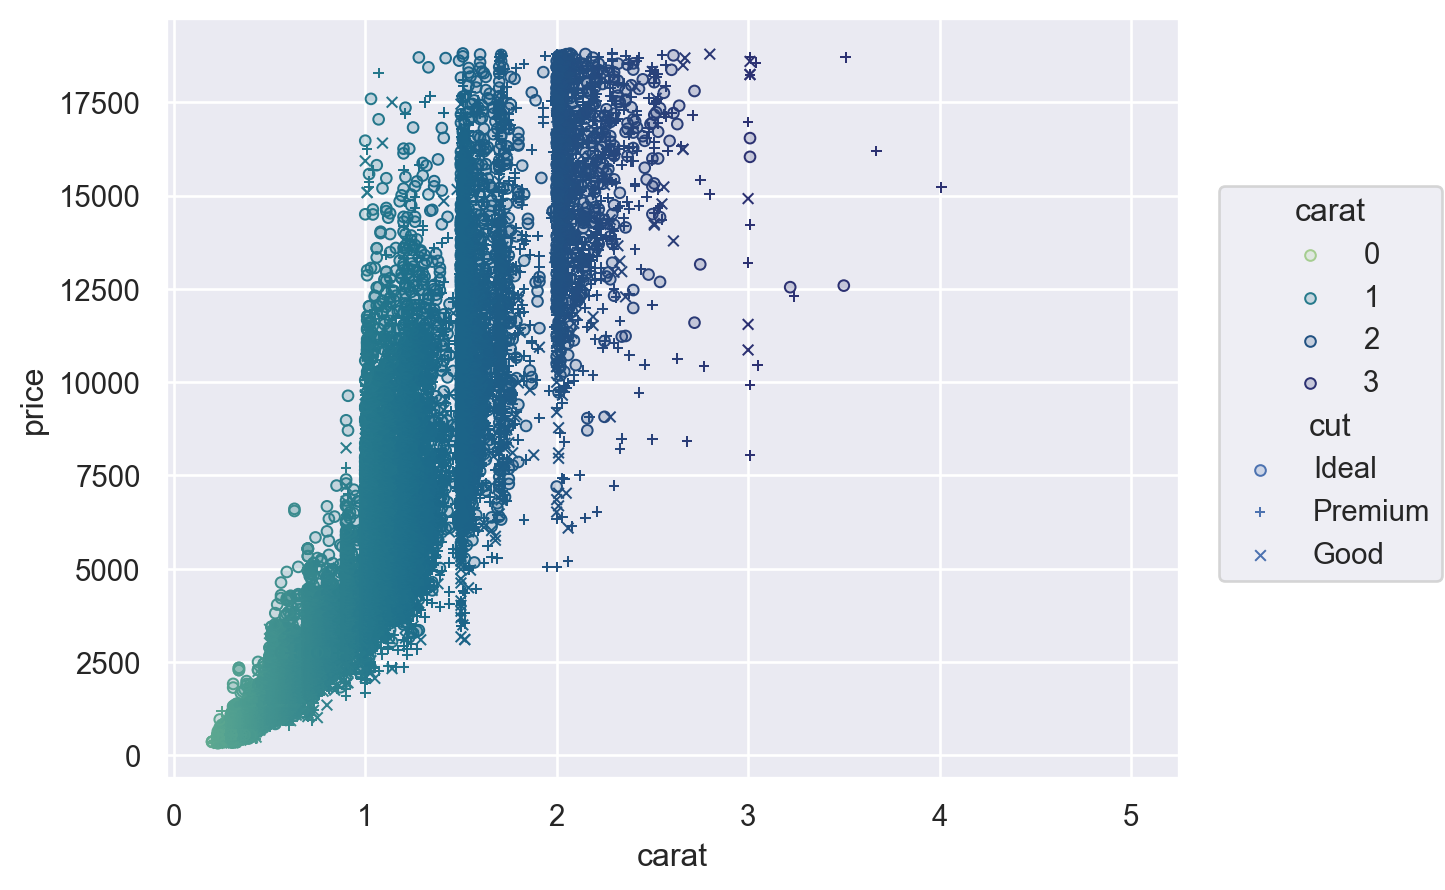

In [45]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat", marker="cut")
    .add(so.Dots())
    .scale(
        color=so.Continuous("crest", norm=(0, 3), trans="sqrt"),
        marker=so.Nominal(["o", "+", "x"], order=["Ideal", "Premium", "Good"]),
    )
)

### Customizing legends and ticks
##### 범례 및 눈금 커스터마이징
`Scale` 개체는 표시되는 방식과 함께 범례에서 눈금 레이블로 표시되어야 하는 값을 지정하는 방법이기도 합니다.   
예를 들어, `Continuous.tick()` 메서드를 사용하면 눈금의 밀도나 위치를 제어할 수 있고 `Continuous.label()` 메서드를 사용하면 형식을 수정할 수 있습니다.

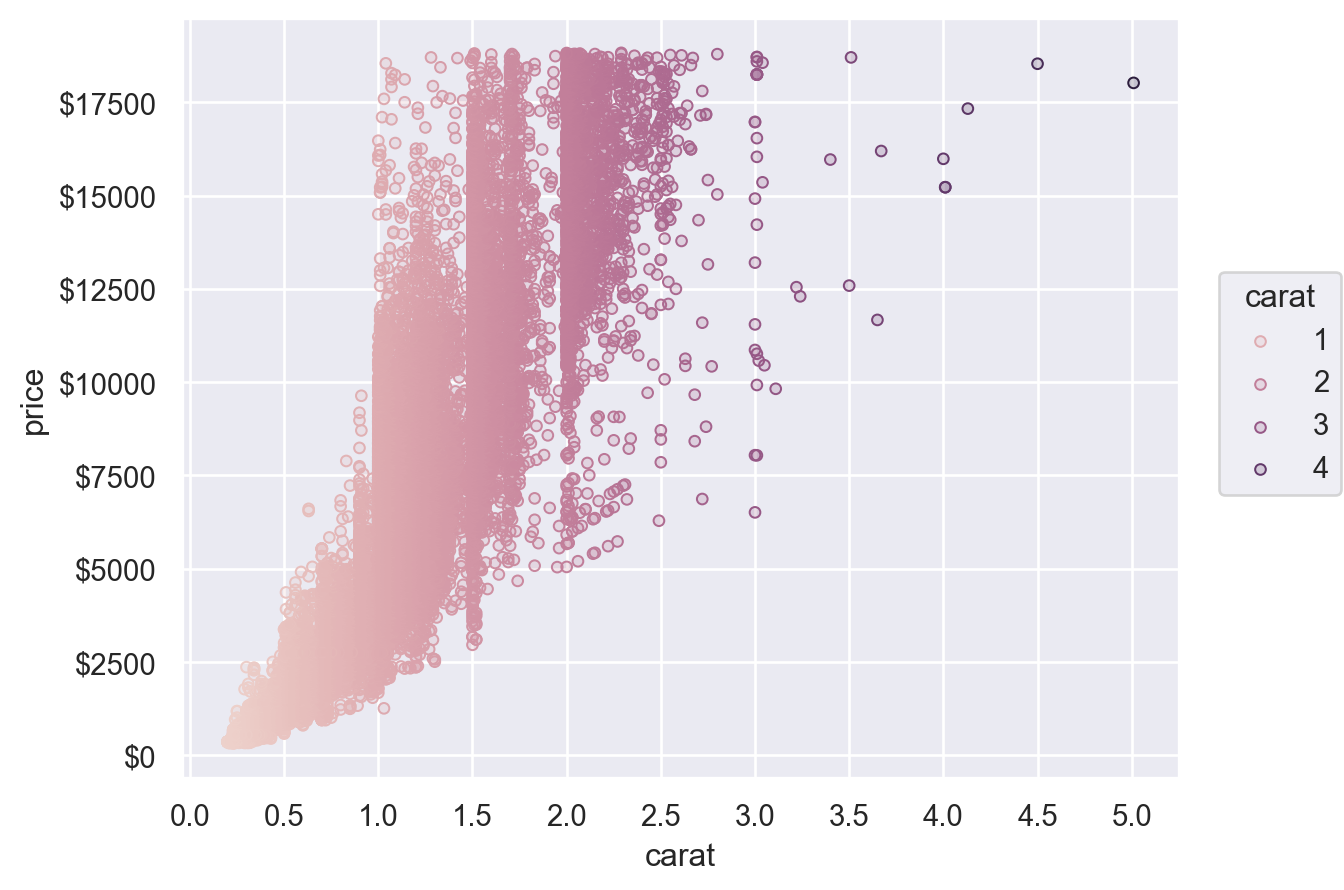

In [46]:
(
    so.Plot(diamonds, x="carat", y="price", color="carat")
    .add(so.Dots())
    .scale(
        x=so.Continuous().tick(every=0.5),
        y=so.Continuous().label(like="${x:.0f}"),
        color=so.Continuous().tick(at=[1, 2, 3, 4]),
    )
)

### Customizing limits, labels, and titles
##### 제한, 레이블, 제목 커스터마이징

`Plot`에는 `Plot.label()`, `Plot.limit()` 및 `Plot.share()`를 포함하여 간단한 사용자 지정을 위한 여러 메서드가 있습니다.

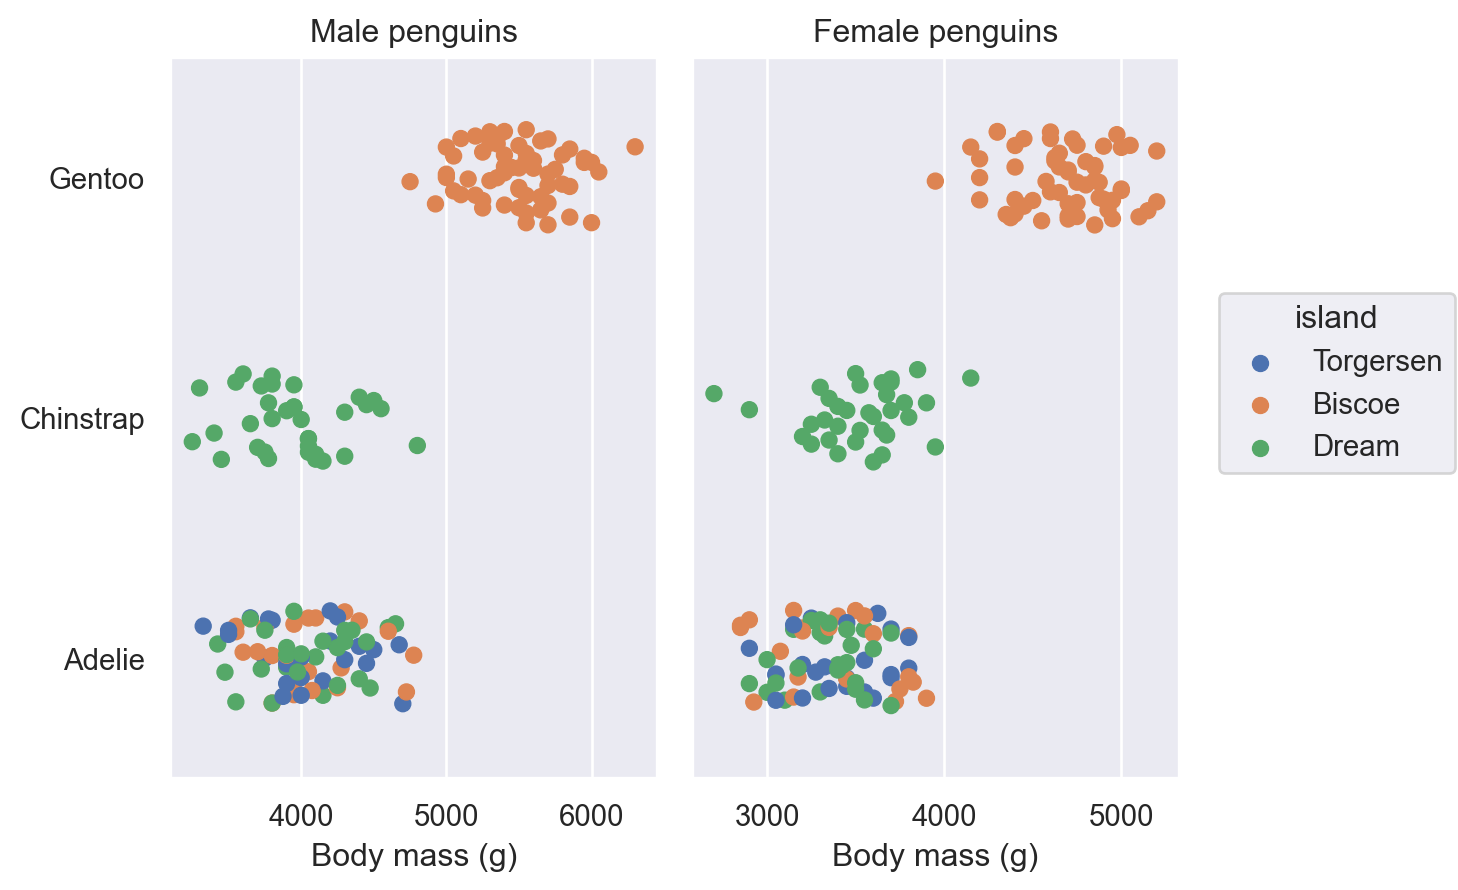

In [61]:
(
    so.Plot(penguins, x="body_mass_g", y="species", color="island")
    .facet(col="sex")
    .add(so.Dot(), so.Jitter(.5)) # Jitter 삭제시 1열로 그려짐(퍼트리는 메서드)
    .share(x=False)
    .limit(y=(-.5, 2.5)) # 이건 y축 한계범위 조절하는건 알겠는데, 예시로 보기 뭔가 헷갈리네
    .label(
        x="Body mass (g)", y="",
        color=str.capitalize, # 첫글자 대문자화...인데 로우데이터가 이미 그렇게 되어있는 듯?
        title="{} penguins".format, #f-string 그거.. 쉽게쓰는것만 계속 써서 .format은 뭔가 계속 헷갈림😥
    )
)

### Theme customization
##### 테마 커스터마이징
마지막으로 `Plot`은 `Plot.theme` 메서드를 통해 데이터 독립적인 테마 지정을 지원합니다.   
현재 이 메서드는 matplotlib rc 파라미터 딕셔너리를 허용합니다. 직접 설정하거나 seaborn의 테마 기능에서 파라미터 패키지를 전달할 수 있습니다.

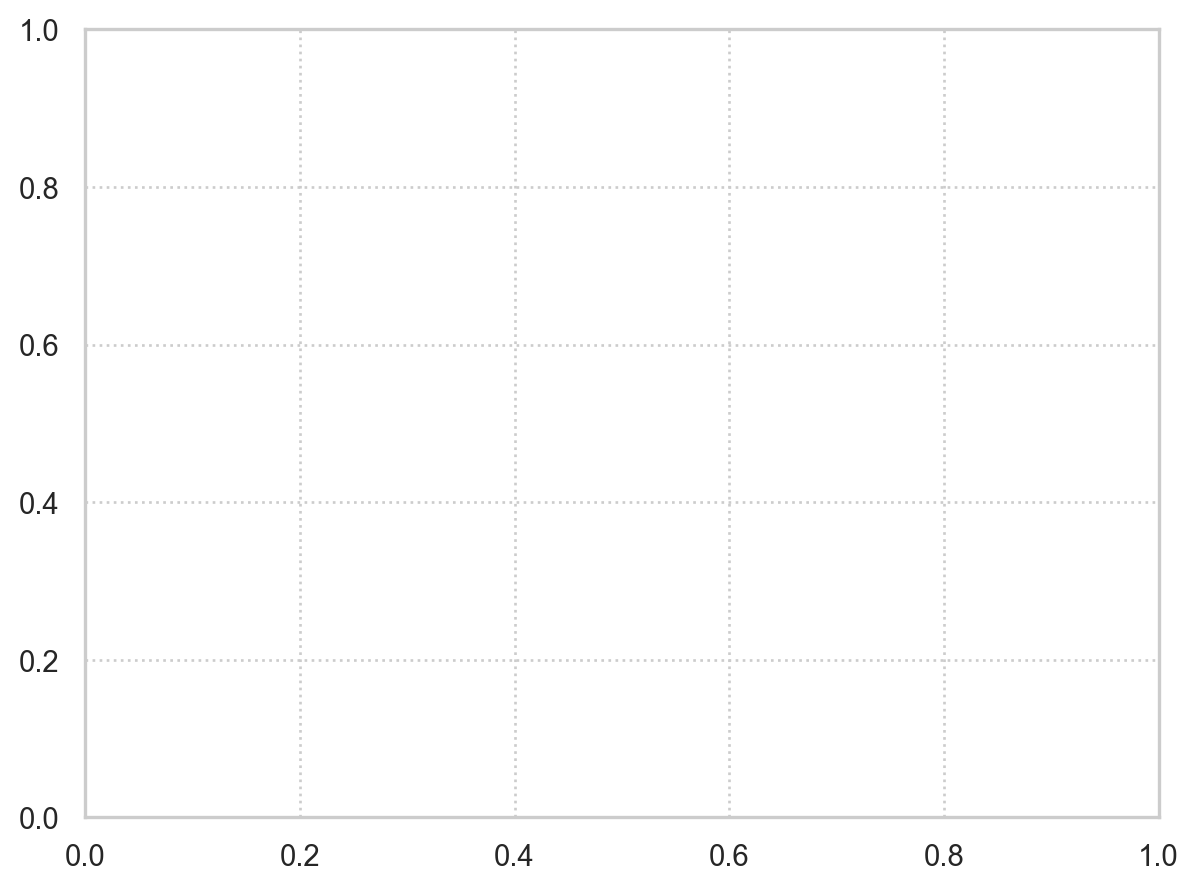

In [62]:
from seaborn import axes_style
so.Plot().theme({**axes_style("whitegrid"), "grid.linestyle": ":"})

오늘도 써먹을만한게 많았는데, 제일 문제는 한글폰트 깨지는걸 계속 해결 못하고 있는 것...   
objects 안쓰면 한글 쓸 수 있는데, 왜 Plot만 쓰면 한글 다깨지냐🫥